In [122]:
# conda env: yttest2

# %config InlineBackend.figure_format = 'retina'
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information numpy, scipy, matplotlib, yt, pandas, torch, pyg, h5py, seaborn, sklearn, umap, astropy, astroquery, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2023-05-09 18:16:26 (GMT+0900) 


/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/_collections_abc.py:769: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


0 Python     3.9.7 64bit [GCC 7.5.0]
1 IPython    8.8.0
2 OS         Linux 3.10.0 862.3.3.el7.x86_64 x86_64 with glibc2.17
3 numpy      1.23.5
4 scipy      1.10.0
5 matplotlib 3.3.4
6 yt         3.6.1
7 pandas     1.4.4
8 torch      1.12.1
9 pyg        The 'pyg' distribution was not found and is required by the application
10 h5py       3.8.0
11 seaborn    0.12.2
12 sklearn    1.0.2
13 umap       0.5.3
14 astropy    The 'astropy' distribution was not found and is required by the application
15 astroquery The 'astroquery' distribution was not found and is required by the application
16 version_information 1.0.4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Data Handling of Graphs

In [9]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [10]:
data.validate(raise_on_error=True) # Check if the data is well defined

True

In [11]:
print(data.keys)

['x', 'edge_index']


In [12]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [13]:
for key, item in data:
    print(f'{key} found in data')

x found in data
edge_index found in data


In [14]:
'edge_attr' in data # how does this syntax work??

False

In [15]:
data.num_nodes

3

In [16]:
data.num_edges

4

In [17]:
data.num_node_features

1

In [18]:
data.has_isolated_nodes()

False

In [19]:
data.has_self_loops()

False

In [20]:
data.is_directed()

False

In [25]:
device = torch.device('cuda')
device

device(type='cuda')

In [26]:
data = data.to(device)

AssertionError: Torch not compiled with CUDA enabled

# Common Benchmark Datasets

## ENZYME

In [803]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/data1/dhhyun/PyG', name='ENZYMES') # Saved in /tmp; remove later
# dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES') # Saved in /tmp; remove later

In [34]:
help(TUDataset)

Help on class TUDataset in module torch_geometric.datasets.tu_dataset:

class TUDataset(torch_geometric.data.in_memory_dataset.InMemoryDataset)
 |  TUDataset(root: str, name: str, transform: Optional[Callable] = None, pre_transform: Optional[Callable] = None, pre_filter: Optional[Callable] = None, use_node_attr: bool = False, use_edge_attr: bool = False, cleaned: bool = False)
 |  
 |  A variety of graph kernel benchmark datasets, *.e.g.*,
 |  :obj:`"IMDB-BINARY"`, :obj:`"REDDIT-BINARY"` or :obj:`"PROTEINS"`,
 |  collected from the `TU Dortmund University
 |  <https://chrsmrrs.github.io/datasets>`_.
 |  In addition, this dataset wrapper provides `cleaned dataset versions
 |  <https://github.com/nd7141/graph_datasets>`_ as motivated by the
 |  `"Understanding Isomorphism Bias in Graph Data Sets"
 |  <https://arxiv.org/abs/1910.12091>`_ paper, containing only non-isomorphic
 |  graphs.
 |  
 |  .. note::
 |      Some datasets may not come with any node labels.
 |      You can then either

In [28]:
len(dataset)

600

In [47]:
dataset

ENZYMES(600)

In [110]:
type(dataset)

torch_geometric.datasets.tu_dataset.TUDataset

In [37]:
import numpy as np
np.shape(dataset)

/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(600, 3, 2)

In [40]:
dataset.size()

AttributeError: 'TUDataset' object has no attribute 'size'

In [29]:
dataset.num_classes

6

In [30]:
dataset.num_node_features

3

In [41]:
print('size :', len(dataset), dataset.num_classes, dataset.num_node_features)

size : 600 6 3


In [32]:
data = dataset[0]
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [33]:
data.is_undirected()

True

In [43]:
train_dataset = dataset[:540]
test_dataset = dataset[540:]

In [44]:
# dataset = dataset.shuffle()
perm = torch.randperm(len(dataset))
perm

tensor([275, 490, 124, 581, 589, 224,  99, 237, 317, 596, 560, 294, 101, 598,
        410, 353, 402, 538, 382, 307,  69, 242,  89,  57, 590,  94,  77, 341,
        526, 145, 485, 459, 109, 518,   4, 513, 494, 335,  91, 291, 322, 396,
        179, 230, 481, 183, 528, 197, 324, 473,  63, 171, 127, 108, 427,  67,
        247,  45, 594, 417, 440, 122,  66, 299, 415,  75,  35, 120, 404,  28,
          7, 492, 177, 434, 333, 403, 126, 271, 546, 300, 359, 562, 346, 226,
        236, 534, 464, 327, 471,  13, 429,  81, 235, 231, 445, 296, 516, 339,
        176,  17,   0, 152, 575, 166, 577, 301, 273, 543, 356, 484, 477, 393,
        443, 250, 557, 496, 573,  80, 334,  36,  18, 234, 395, 411, 118, 564,
         86, 260,  88, 157, 132, 380, 419, 140, 387, 337, 421, 229, 343, 503,
        358, 480, 454, 160, 205,  49, 325,  78, 265, 407,  61, 400,   5, 389,
        578, 246, 545, 568, 357, 130, 424, 574, 582, 466, 558, 279, 509,  58,
        524,  15, 349, 133, 540, 161,  82, 441, 218,  73, 347, 1

In [ ]:
dataset = dataset[perm]

In [46]:
dataset[[5,2,10]]

ENZYMES(3)

In [804]:
dataset[0]

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [805]:
dataset[0].x

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [806]:
dataset[0].y

tensor([5])

## MUTAG

In [790]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/data1/dhhyun/PyG', name='MUTAG') # Saved in /tmp; remove later
# dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES') # Saved in /tmp; remove later

Extracting /data1/dhhyun/PyG/MUTAG/MUTAG.zip
Processing...
Done!


In [793]:
len(dataset)

188

In [802]:
dataset[0]

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])

In [794]:
dataset[0].x

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [799]:
dataset[0].y

tensor([1])

In [792]:
dataset.num_classes

2

## Cora

In [807]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/data1/dhhyun/PyG', name='Cora')
dataset

Cora()

In [808]:
len(dataset)

1

In [52]:
dataset.num_classes

7

In [53]:
dataset.num_node_features

1433

In [54]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [55]:
data.is_undirected()

True

In [56]:
data.val_mask.sum().item()

500

In [59]:
data.val_mask

tensor([False, False, False,  ..., False, False, False])

In [60]:
data.test_mask.sum().item()

1000

In [809]:
dataset[0].y

tensor([3, 4, 4,  ..., 3, 3, 3])

## GNNBenchmarkDataset

In [811]:
from torch_geometric.datasets import GNNBenchmarkDataset

dataset = GNNBenchmarkDataset(root='/data1/dhhyun/PyG', name='PATTERN')
dataset

Extracting /data1/dhhyun/PyG/PATTERN/raw/PATTERN_v2.zip
Processing...
Done!


PATTERN(10000)

In [815]:
len(dataset)

10000

In [812]:
dataset[0]

Data(x=[108, 3], edge_index=[2, 4884], y=[108])

In [813]:
dataset[0].x

tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0

In [814]:
dataset[0].y

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [833]:
from torch_geometric.transforms import RandomNodeSplit

In [835]:
transform = T.RandomNodeSplit()
transform(dataset[0])

Data(x=[108, 3], edge_index=[2, 4884], y=[108], train_mask=[108], val_mask=[108], test_mask=[108])

In [836]:
transform(batch)

DataBatch(x=[1896, 3], edge_index=[2, 97146], y=[1896], batch=[1896], ptr=[17], train_mask=[1896], val_mask=[1896], test_mask=[1896])

In [816]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    batch

In [817]:
batch

DataBatch(x=[1896, 3], edge_index=[2, 97146], y=[1896], batch=[1896], ptr=[17])

In [830]:
108*32

3456

In [826]:
next(iter(loader))

DataBatch(x=[3613, 3], edge_index=[2, 176152], y=[3613], batch=[3613], ptr=[33])

In [827]:
batch.x

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])

In [828]:
batch.y

tensor([0, 0, 0,  ..., 0, 1, 0])

In [829]:
len(batch.y)

1896

In [837]:
loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

for batch in loader:
    batch

In [838]:
batch

DataBatch(x=[1189120, 3], edge_index=[2, 60798542], y=[1189120], batch=[1189120], ptr=[10001])

In [839]:
len(dataset)*len(dataset[0].x)

1080000

## Batch

In [61]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/data1/dhhyun/PyG', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    batch

In [62]:
batch

DataBatch(edge_index=[2, 3078], x=[782, 21], y=[24], batch=[782], ptr=[25])

In [89]:
next(iter([1,2,3]))

1

In [88]:
next(iter(loader))

DataBatch(edge_index=[2, 4226], x=[1098, 21], y=[32], batch=[1098], ptr=[33])

In [85]:
iter(loader).__next__()

DataBatch(edge_index=[2, 3698], x=[988, 21], y=[32], batch=[988], ptr=[33])

In [75]:
i = 0
for batch in loader:
    i+=1
    batch
    if i > 0 : break 
batch

DataBatch(edge_index=[2, 4312], x=[1179, 21], y=[32], batch=[1179], ptr=[33])

In [90]:
batch.num_graphs

32

In [91]:
batch.batch # a column vector which maps each node to its respective graph in the batch

tensor([ 0,  0,  0,  ..., 31, 31, 31])

In [97]:
(batch.batch == 0).sum()

tensor(88)

In [65]:
dataset[0]

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [102]:
dataset[0].x

tensor([[ 1.1000e+01,  1.5887e+01,  3.7780e+01, -5.1000e-01,  1.7010e+00,
          9.3900e+01,  4.0000e+00,  5.0000e+00,  2.0000e+00,  4.0000e+00,
          4.0000e+00,  3.0000e+00,  3.0000e+00,  4.0000e+00,  4.0000e+00,
          3.0000e+00,  6.0000e+00,  2.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 1.1000e+01,  1.6363e+01,  4.0380e+01, -2.0300e+00,  1.7770e+00,
          1.0260e+02,  2.0000e+00,  7.0000e+00,  2.0000e+00,  6.0000e+00,
          2.0000e+00,  3.0000e+00,  3.0000e+00,  2.0000e+00,  6.0000e+00,
          1.0000e+00,  8.0000e+00,  2.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 1.6000e+01,  2.1395e+01,  6.3350e+01,  2.0400e+00,  2.9810e+00,
          1.3600e+02,  2.0000e+00,  7.0000e+00,  7.0000e+00,  6.0000e+00,
          4.0000e+00,  6.0000e+00,  6.0000e+00,  2.0000e+00,  8.0000e+00,
          2.0000e+00,  7.0000e+00,  7.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  8.8817e+00,  1.6920e

In [103]:
dataset[0].y

tensor([5])

In [64]:
dataset[30]

Data(edge_index=[2, 162], x=[38, 21], y=[1])

In [101]:
from torch_geometric.utils import scatter

for data in loader:
    x = scatter(data.x, data.batch, dim=0, reduce='mean')
    print(x.size())

torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([32, 21])
torch.Size([24, 21])


## Transform

### Point Cloud and Nearest Neighbor

In [787]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/data1/dhhyun/PyG/ShapeNet', categories=['Airplane'])
# Point Cloud Dataset

dataset[0]

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

We can convert the point cloud dataset into a graph dataset by generating nearest neighbor graphs from the point clouds via transforms

torch_geometric.transforms.Compose

pre_transform

transform

In [788]:
dataset.data

/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[6044171, 3], y=[6044171], pos=[6044171, 3], category=[2349])

In [789]:
dataset.num_classes

50

In [157]:
transform = T.KNNGraph(k=6)
transform(dataset)

AttributeError: 'LatteStarDataset' object has no attribute 'pos'

In [169]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/data1/dhhyun/PyG/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))

dataset[0]

Processing...


AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [170]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6),
                    transform=T.RandomJitter(0.01))

dataset[0]

Extracting /tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...


AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [107]:
help(T.KNNGraph)

Help on class KNNGraph in module torch_geometric.transforms.knn_graph:

class KNNGraph(torch_geometric.transforms.base_transform.BaseTransform)
 |  KNNGraph(k: int = 6, loop: bool = False, force_undirected: bool = False, flow: str = 'source_to_target', cosine: bool = False, num_workers: int = 1)
 |  
 |  Creates a k-NN graph based on node positions :obj:`data.pos`
 |  (functional name: :obj:`knn_graph`).
 |  
 |  Args:
 |      k (int, optional): The number of neighbors. (default: :obj:`6`)
 |      loop (bool, optional): If :obj:`True`, the graph will contain
 |          self-loops. (default: :obj:`False`)
 |      force_undirected (bool, optional): If set to :obj:`True`, new edges
 |          will be undirected. (default: :obj:`False`)
 |      flow (str, optional): The flow direction when used in combination with
 |          message passing (:obj:`"source_to_target"` or
 |          :obj:`"target_to_source"`).
 |          If set to :obj:`"source_to_target"`, every target node will have
 

A k-NN graph is a graph where each node is connected to its k nearest neighbors, as determined by Euclidean distance.

##### How can I use 3 velocities?
First try with only positions?

x = (10000, 3), y = (10000, 3)?

In [ ]:
# dataset = ShapeNet(root='/data1/dhhyun/PyG/ShapeNet', categories=['Airplane'],
#                     pre_transform=T.KNNGraph(k=6),
#                     transform=T.RandomJitter(0.01))

## GCN layer

In [710]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/data1/dhhyun/PyG', name='Cora')
dataset

Cora()

In [369]:
dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [711]:
dataset[0].train_mask

tensor([ True,  True,  True,  ..., False, False, False])

In [714]:
torch.tensor([1,0], dtype=bool)

tensor([ True, False])

In [367]:
dataset[0].x[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [370]:
dataset[0].edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [372]:
data.x

array([[ 132.05362778,    2.29424105,    0.95270373, -176.79445859,
          65.35561802,  278.90249   ],
       [ 131.62427632,    2.30285071,    0.93999615,   33.13485409,
         163.91061823,  150.58996426],
       [ 136.7195014 ,    2.29860313,    0.90857279,   -7.92235812,
         165.46655229,  166.08579585],
       ...,
       [ 139.70583598,    1.77799532,    0.88683511,  -29.16897125,
          65.60134122,  163.2130958 ],
       [ 136.31247521,    1.7829794 ,    0.8049781 ,    7.68629286,
          70.05421813,  238.30106109],
       [ 132.08981788,    1.78009553,    0.78756041,  -52.94879644,
         151.2189843 ,  178.2498639 ]])

In [371]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2427, 2427, 2427],
        [   1,    3,  218,  ..., 2420, 2419,  426]])

In [366]:
dataset.num_node_features

1433

In [337]:
dataset.num_classes

7

In [345]:
dataset[0].y[10:32]

tensor([0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6, 3, 3, 6, 3, 2, 4, 3, 6])

In [422]:
dataset[0].y.dtype

torch.int64

(array([351., 217.,   0., 418.,   0., 818., 426.,   0., 298., 180.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

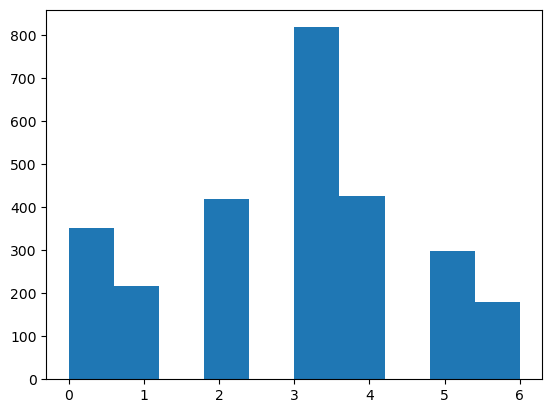

In [342]:
plt.hist(np.array(dataset[0].y))

In [350]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

#### train

In [353]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch%20==0: print('.')

.
.
.
.
.
.
.
.
.
.


In [354]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [7]:
device

device(type='cpu')

#### eval

In [9]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7930


In [10]:
pred

tensor([3, 4, 4,  ..., 5, 3, 3])

(array([385., 240.,   0., 428.,   0., 631., 524.,   0., 276., 224.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

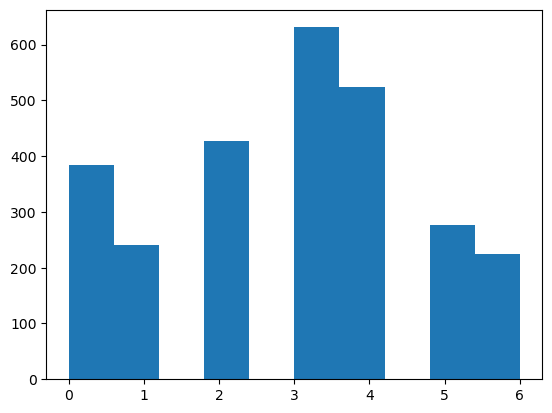

In [16]:
import matplotlib.pyplot as plt
plt.hist(np.array(pred))

In [13]:
len(pred)

2708

In [20]:
x = torch.randn(3, 2)
x

tensor([[-1.4899, -0.2606],
        [-1.4863,  0.0143],
        [ 0.6382, -0.7280]])

In [25]:
x.argmax(dim=1)

tensor([1, 1, 0])

### For FIRE2

Use undirected graph?

## Define User Dataset

https://www.youtube.com/watch?v=QLIkOtKS4os&ab_channel=DeepFindr

https://gist.github.com/rohithteja/677f71357cc73f1a2d9294736908d8e2

In [93]:
import os.path as osp
import pandas as pd

import torch
from torch_geometric.data import Dataset, download_url


class LatteStarDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        """
        If this file exists in raw_dir, the download is not triggered.
        """
        return ['df_star_sel.csv']
        # return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        """If found in raw_dir, processing is skipped"""
        return ['data_0.pt']
        # return [f'data_{i}.pt' for i in list(self.data.index)]
        # return ['data_1.pt', 'data_2.pt', ...]

    def download(self):
        # Download to `self.raw_dir`.
        pass
        # path = download_url(url, self.raw_dir)

    def process(self):
        df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
        X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'], df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
        pos = np.column_stack((df_star_sel['x'], df_star_sel['y'], df_star_sel['z']))
        y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')
        data = Data(x=X, pos=pos, y=y)
        self.data = data
        idx = 0
        for raw_path in self.raw_paths:
            torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
            
#         idx = 0
#         for raw_path in self.raw_paths:
#             # Read data from `raw_path`.
#             data = Data(...)

#             if self.pre_filter is not None and not self.pre_filter(data):
#                 continue

#             if self.pre_transform is not None:
#                 data = self.pre_transform(data)

#             torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
#             idx += 1

    def len(self):
        # return self.data.shape
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [148]:
import os.path as osp
import pandas as pd

import torch
from torch_geometric.data import Dataset, download_url


class LatteStarDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        """
        If this file exists in raw_dir, the download is not triggered.
        """
        return ['df_star_sel.csv']

    @property
    def processed_file_names(self):
        """If found in raw_dir, processing is skipped"""
        return ['data_0.pt']
        # return [f'data_{i}.pt' for i in list(self.data.index)]

    def download(self):
        # Download to `self.raw_dir`.
        pass

    def process(self):
        df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
        X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'], 
                             df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
        pos = np.column_stack((df_star_sel['x'], df_star_sel['y'], df_star_sel['z']))
        y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')
        data = Data(x=X, pos=pos, y=y)
        self.data = data
        idx = 0
        for raw_path in self.raw_paths:
            torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
            
    def len(self):
        # return self.data.shape
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [149]:
m12f = LatteStarDataset(root='/data1/dhhyun/PyG/LatteStarDataset')

Processing...
Done!


In [150]:
m12f

LatteStarDataset()

In [151]:
m12f[0]

Data(x=[1279853, 6], y=[1279853], pos=[1279853, 3])

In [142]:
m12f.data

Data(x=[1279853, 6], y=[1279853], pos=[1279853, 3])

In [ ]:
# Don't run it. Never ends
# LatteStarDataset.__getitem__

In [143]:
LatteStarDataset.raw_paths

In [144]:
LatteStarDataset.get

<function __main__.LatteStarDataset.get(self, idx)>

In [145]:
LatteStarDataset.processed_dir

In [146]:
LatteStarDataset.raw_file_names

In [147]:
LatteStarDataset.processed_file_names

In [85]:
torch.load('/data1/dhhyun/PyG/LatteStarDataset/processed/data_0.pt').pos

array([[-51.49846175,  35.83695662,  -8.30931485],
       [-51.85735564,  35.94858595,  -8.61162557],
       [-50.21101142,  35.56457121,  -5.08829277],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

In [164]:
m12f.data.pos

array([[-51.49846175,  35.83695662,  -8.30931485],
       [-51.85735564,  35.94858595,  -8.61162557],
       [-50.21101142,  35.56457121,  -5.08829277],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

In [162]:
transform = T.KNNGraph(k=6)
transform(m12f)

AttributeError: 'LatteStarDataset' object has no attribute 'pos'

In [166]:
import torch_geometric.transforms as T

dataset = LatteStarDataset(root='/data1/dhhyun/PyG/LatteStarGraph',
                    pre_transform=T.KNNGraph(k=6))

dataset[0]

Data(x=[1279853, 6], y=[1279853], pos=[1279853, 3])

In [167]:
import torch_geometric.transforms as T

dataset = LatteStarDataset(root='/data1/dhhyun/PyG/LatteStarGraph',
                    transform=T.KNNGraph(k=6))

dataset[0]

AttributeError: 'NoneType' object has no attribute 'knn_graph'

### load csv

In [29]:
import pandas as pd

df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
df_star_sel

,m,x,y,z,central_distance,vx,vy,vz,vertical_distance,radial_distance,...,z_rot,r,theta,phi,v_r,v_theta,v_phi,dist_to_closest_subhalo,closest_subhalo,group
7,5142.776739,-51.498462,35.836957,-8.309315,63.288417,-258.404358,242.893997,-1.681878,-5.349243,63.061948,...,-5.349243,63.288417,1.702469,2.533634,348.025513,44.395679,-51.772585,13.706301,1245,background
8,4939.851807,-51.857356,35.948586,-8.611626,63.683956,-258.024841,242.313507,6.102988,-5.276609,63.464980,...,-5.276609,63.683956,1.706436,2.535431,346.064513,53.389744,-52.142008,14.026253,1245,background
21,5469.606559,-50.211011,35.564571,-5.088293,61.740385,-106.118385,126.164398,22.475983,-5.638754,61.482352,...,-5.638754,61.740385,1.653304,2.525316,157.124544,35.546220,-41.618275,12.374831,1245,background
35,5968.481651,-48.993296,34.972928,-15.105963,62.061573,-83.044243,83.387238,81.871582,-6.123241,61.758763,...,-6.123241,62.061573,1.816669,2.521644,92.620242,107.653253,-19.621455,15.066513,16456,background
36,4819.924339,-47.318390,33.865275,-14.549997,59.979908,-269.813049,217.759888,-15.518835,-5.988330,59.680225,...,-5.988330,59.979908,1.815822,2.520414,339.570656,68.912973,-20.051331,14.757757,1245,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15775191,5457.901026,-61.768705,-71.191541,79.553575,123.338476,-114.198151,178.095352,49.017944,95.580382,77.953642,...,95.580382,123.338476,0.869770,-2.285443,-13.989616,75.952282,-202.971605,21.707833,2316,background
15775192,5211.407880,-63.499997,-72.727044,79.136690,124.836246,-174.612915,167.309341,82.023315,97.761203,77.632696,...,97.761203,124.836246,0.884180,-2.288565,43.345260,70.527596,-241.571846,19.412699,2316,background
15775193,4751.189957,-64.309226,-67.793243,78.902700,122.299781,-223.646942,153.389313,134.578781,93.899642,78.358750,...,93.899642,122.299781,0.869566,-2.329827,119.398676,75.319447,-267.821996,23.186499,2316,background
15775194,4668.739064,-63.412972,-66.873470,79.937979,121.997321,-143.257889,166.792633,63.370174,92.694163,79.316697,...,92.694163,121.997321,0.856291,-2.329640,24.558654,62.585613,-218.719678,23.072850,16960,background


In [220]:
X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'], df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
print(np.shape(X))
y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')

(1279853, 6)


In [43]:
pos = np.column_stack((df_star_sel['x'], df_star_sel['y'], df_star_sel['z']))
pos

array([[-51.49846175,  35.83695662,  -8.30931485],
       [-51.85735564,  35.94858595,  -8.61162557],
       [-50.21101142,  35.56457121,  -5.08829277],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

In [47]:
import torch
from torch_geometric.data import Data

# edge_index = torch.tensor([[0, 1, 1, 2],
#                            [1, 0, 2, 1]], dtype=torch.long)
# x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=X, pos=pos, y=y)
data

Data(x=[1279853, 6], y=[1279853], pos=[1279853, 3])

In [36]:
data.y

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
import torch_geometric.transforms as T
T.KNNGraph

torch_geometric.transforms.knn_graph.KNNGraph

In [48]:
transform = T.KNNGraph(k=6)
transform(data)

AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [50]:
data.pos

array([[-51.49846175,  35.83695662,  -8.30931485],
       [-51.85735564,  35.94858595,  -8.61162557],
       [-50.21101142,  35.56457121,  -5.08829277],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

In [ ]:
mask = df_star_sel['theta'] <= np.pi/2
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]
print('len train, test:', len(X_train), len(X_test))

## Without Dataset

In [118]:
X[:100,:]

array([[ 6.32884171e+01,  1.70246930e+00,  2.53363444e+00,
         3.48025513e+02,  4.43956786e+01, -5.17725851e+01],
       [ 6.36839561e+01,  1.70643628e+00,  2.53543114e+00,
         3.46064513e+02,  5.33897438e+01, -5.21420078e+01],
       [ 6.17403848e+01,  1.65330424e+00,  2.52531643e+00,
         1.57124544e+02,  3.55462203e+01, -4.16182750e+01],
       [ 6.20615731e+01,  1.81666900e+00,  2.52164440e+00,
         9.26202418e+01,  1.07653253e+02, -1.96214554e+01],
       [ 5.99799075e+01,  1.81582196e+00,  2.52041426e+00,
         3.39570656e+02,  6.89129735e+01, -2.00513308e+01],
       [ 6.11851271e+01,  1.81201365e+00,  2.49571643e+00,
         2.82715127e+02, -3.75967747e+01, -9.85831240e+01],
       [ 6.14325097e+01,  1.80765798e+00,  2.50609684e+00,
         9.23826229e+01,  9.11305068e+01, -3.87255624e+01],
       [ 6.17752707e+01,  1.82475039e+00,  2.50326530e+00,
         2.13162327e+02,  8.75703808e+01, -1.38633951e+01],
       [ 6.17647762e+01,  1.82435673e+00,  2.496

In [126]:
import torch
from torch_geometric.nn.pool import knn_graph

x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
batch = torch.tensor([0, 0, 0, 0])
edge_index = knn_graph(x, k=2, batch=batch, loop=False)

AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [119]:
from torch_geometric.nn import knn_graph
x = torch.Tensor(X[:100,:])
# batch = torch.tensor([0, 0, 0, 0]) ?
edge_index = knn_graph(x, k=2, loop=False) #batch=batch, 

AttributeError: 'NoneType' object has no attribute 'knn_graph'

In [120]:
from torch_geometric.nn import knn_graph
x = torch.Tensor(X[:100,:])
batch = torch.tensor([0, 0, 0, 0, 0, 0])
edge_index = knn_graph(x, k=2, batch=batch, loop=False) 

AttributeError: 'NoneType' object has no attribute 'knn_graph'

## Scikitlearn KDTree

In [253]:
import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
tree = KDTree(X, leaf_size=2)              
dist, ind = tree.query(X[:1], k=3)                
print(ind)  # indices of 3 closest neighbors
print(np.delete(ind, [np.where(dist==0)][0]))

print(dist)  # distances to 3 closest neighbors

[[0 3 1]]
[3 1]
[[0.         0.19662693 0.29473397]]


In [254]:
X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [255]:
X[:1]

array([[0.5488135 , 0.71518937, 0.60276338]])

In [256]:
np.linalg.norm(X[:1] - X, axis=1)

array([0.        , 0.29473397, 0.41689499, 0.19662693, 0.57216693,
       0.86543108, 0.46672837, 0.398299  , 0.63410319, 0.47902444])

In [177]:
pos

array([[-51.49846175,  35.83695662,  -8.30931485],
       [-51.85735564,  35.94858595,  -8.61162557],
       [-50.21101142,  35.56457121,  -5.08829277],
       ...,
       [-64.30922627, -67.79324332,  78.90270011],
       [-63.41297161, -66.87346951,  79.93797883],
       [-69.20800217, -67.42352876,  78.9605236 ]])

### Leaf size

In [180]:
import numpy as np
from sklearn.neighbors import KDTree
from time import time

start = time()
tree = KDTree(pos, leaf_size=40)
dist, ind = tree.query(pos[:1], k=6)
print(ind)  # indices of k closest neighbors
print(dist)  # distances to k closest neighbors
print(time()-start, 's')

[[     0      1 256048    857    856    859]]
[[0.         0.48234604 1.05155901 1.2409763  1.4325636  1.81258842]]
0.6663627624511719 s


In [181]:
import numpy as np
from sklearn.neighbors import KDTree
from time import time

start = time()
tree = KDTree(pos, leaf_size=2)
dist, ind = tree.query(pos[:1], k=6)
print(ind)  # indices of k closest neighbors
print(dist)  # distances to k closest neighbors
print(time()-start, 's')

[[     0      1 256048    857    856    859]]
[[0.         0.48234604 1.05155901 1.2409763  1.4325636  1.81258842]]
1.121586561203003 s


In [190]:
import numpy as np
from sklearn.neighbors import KDTree
from time import time

start = time()
tree = KDTree(pos, leaf_size=10**8) # optimal?
dist, ind = tree.query(pos[:1], k=6)
print(ind)  # indices of k closest neighbors
print(dist)  # distances to k closest neighbors
print(time()-start, 's')

[[     0      1 256048    857    856    859]]
[[0.         0.48234604 1.05155901 1.2409763  1.4325636  1.81258842]]
0.03217935562133789 s


In [653]:
np.shape(pos)

(1279853, 3)

### KDTree on total m12f

In [ ]:
from sklearn.neighbors import KDTree
from time import time
from tqdm import tqdm
start = time()

k = 10
knnlist = []
# for xyz in pos:
for i in tqdm(range(len(pos))):
    tree = KDTree(pos, leaf_size=10**8)
    xyz = pos[i:i+1]
    dist, ind = tree.query(xyz, k=k)
    knnlist.append(np.delete(ind, [np.where(dist==0)][0]))
    # knnlist.append(ind)
    # if i%int(len(pos)/100)==0: print(time()-start, f's elapsed, {i}th checkpoint')
    
print('total time', (time()-start)/60, 'min')

  3%|██▍                                                                      | 42945/1279853 [18:12<8:45:54, 39.20it/s]

In [ ]:
tuples = []
for n, row in enumerate(knnlist2):
    # for knn in row:
    index_tuple = np.column_stack((np.ones(len(row), dtype='int')*n, row))
    tuples.append(index_tuple)
    
edge_index_array = np.concatenate(tuples, axis=0)
edge_index_array

In [ ]:
np.savetxt('m12f_graph.csv', edge_index_array, delimiter=',', fmt='%d') # int format

In [ ]:
pwd

'/home/dhhyun'

### Load graph csv

In [675]:
edge_index_array = np.genfromtxt('m12f_graph.csv', delimiter=',', dtype='int')
edge_index_array

array([[   0,    1],
       [   0, 1313],
       [   0,    5],
       ...,
       [1328,  758],
       [1328,  854],
       [1328,  855]])

In [676]:
len(edge_index_array)

13290

In [671]:
type(np.genfromtxt('m12f_graph.csv', delimiter=',', dtype='int')[0,0])

numpy.int64

In [661]:
edge_index = torch.tensor(edge_index_array, dtype=torch.long)
edge_index = edge_index.t().contiguous()
edge_index

tensor([[   0,    0,    0,  ..., 1328, 1328, 1328],
        [   1, 1313,    5,  ...,  758,  854,  855]])

In [677]:
graphtest = np.genfromtxt('m12f_graph_k10.csv', delimiter=',', dtype='int')
graphtest

array([[      0,       1],
       [      0,  256048],
       [      0,     857],
       ...,
       [1279852, 1279798],
       [1279852, 1279849],
       [1279852,  855964]])

In [678]:
np.shape(graphtest)

(11518677, 2)

In [680]:
np.shape(df_star_sel)

(1279853, 22)

In [217]:
for i in range(10):
    if i%int(10/3)==0: print(f'{i}')

0
3
6
9


In [213]:
int(len(pos)/100)

12798

In [214]:
len(pos)

1279853

In [681]:
knnlist

[array([     1, 256048,    857,    856,    859,    854,    855,    842,
           850]),
 array([     0, 256048,    857,    859,    856,    849,    845,    842,
        256047]),
 array([   839,    838,    837,    840, 914757,    854, 914756,    315,
           855]),
 array([256232,      7,      6, 800497,     12, 800496, 800498, 800500,
           465]),
 array([800473,     53,     60, 800506,     10,   2490, 800498, 800542,
             6]),
 array([     6,      9, 800500,      8,      7,    439,    461,    395,
        800504]),
 array([800500,      5,    395,      7,      8,      3,    461, 800497,
        800496]),
 array([     8,    461,      9,      5,      6,     12,      3,     10,
        800500]),
 array([  7, 461,   9,   5,   6, 459, 439, 460, 438]),
 array([  8, 438,   5,   7, 439, 461, 437,  10, 459]),
 array([  12,    9,   52,    7,    8, 2489,    4,   53,   11]),
 array([    22,     13,     21,     12,   2489,     23,     16,     20,
        256215]),
 array([  11,   

In [682]:
len(knnlist)

1279853

#### LoaderTest

In [695]:
# from torch_geometric.data import Data#, Dataloader
from torch_geometric.loader import DataLoader

data = Data(x=X, edge_index=edge_index, y=y) #, pos=pos_sub # no need; we have edges
loader = DataLoader([data], batch_size=32, shuffle=True)
for batch in loader:
    print('.')
    len(batch)

.


In [696]:
data

Data(x=[10, 3], edge_index=[2, 13290], y=[1329])

In [697]:
batch

DataBatch(x=[1], edge_index=[2, 13290], y=[1], batch=[10], ptr=[2])

In [699]:
data.x

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [698]:
batch.x

[array([[0.5488135 , 0.71518937, 0.60276338],
        [0.54488318, 0.4236548 , 0.64589411],
        [0.43758721, 0.891773  , 0.96366276],
        [0.38344152, 0.79172504, 0.52889492],
        [0.56804456, 0.92559664, 0.07103606],
        [0.0871293 , 0.0202184 , 0.83261985],
        [0.77815675, 0.87001215, 0.97861834],
        [0.79915856, 0.46147936, 0.78052918],
        [0.11827443, 0.63992102, 0.14335329],
        [0.94466892, 0.52184832, 0.41466194]])]

In [688]:
X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [701]:
data

Data(x=[10, 3], edge_index=[2, 13290], y=[1329])

In [704]:
len(data.x)

10

In [706]:
selected_indices = np.random.choice(10, size=9, replace=False)
selected_indices

array([9, 1, 7, 8, 5, 4, 2, 6, 0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [718]:
train_mask = np.zeros(len(data.x))

num_samples = int(0.9 * len(data.x))

selected_elements = np.random.choice(train_mask, size=num_samples, replace=False)
train_mask[selected_indices] = 1
~torch.tensor(train_mask, dtype=torch.bool)

tensor([False, False, False,  True, False, False, False, False, False, False])

## Subbox

In [221]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [226]:
np.where(y==1)[0]

array([   4225,    4226,    4229, ..., 1264549, 1270704, 1278233])

In [229]:
df_star_sel.iloc[np.where(y==1)[0]]

,m,x,y,z,central_distance,vx,vy,vz,vertical_distance,radial_distance,...,z_rot,r,theta,phi,v_r,v_theta,v_phi,dist_to_closest_subhalo,closest_subhalo,group
42802,4956.929530,-8.360847,-109.978925,9.667765,110.719165,-59.088619,262.948822,170.118195,99.529388,48.503963,...,99.529388,110.719165,1.483367,-1.646673,-241.874434,191.971397,-78.851056,0.867479,16230,halo_associated
42803,4814.936370,-7.887193,-109.809126,9.756430,110.523481,-55.419735,246.825119,175.680557,99.147876,48.837881,...,99.147876,110.523481,1.482407,-1.642500,-225.766770,196.376679,-72.960332,0.919490,16230,halo_associated
42806,4403.045070,-8.331011,-110.590662,10.591714,111.408638,-71.063591,256.615753,179.130112,100.077833,48.952140,...,100.077833,111.408638,1.475582,-1.645986,-232.387542,202.138979,-90.139553,0.316534,16230,halo_associated
42808,5102.323983,-8.337700,-110.452802,10.007782,111.218229,-71.637772,274.255859,178.827362,99.939867,48.800793,...,99.939867,111.218229,1.480691,-1.646140,-250.906429,202.225119,-92.078430,0.455219,16230,halo_associated
42809,4690.738358,-7.893754,-110.216491,9.502204,110.906619,-62.560902,261.855957,172.606750,99.493177,49.003938,...,99.493177,110.906619,1.485014,-1.642295,-240.985254,193.967002,-81.107387,0.982227,16230,halo_associated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571613,5513.107970,-12.518629,0.678061,15.823391,20.188005,-230.395126,273.184601,11.118540,6.317187,19.174167,...,6.317187,20.188005,0.670032,3.087481,160.758825,-184.995814,-260.323858,0.927028,16240,halo_associated
15571615,5544.496549,-12.831611,0.756246,15.627498,20.234645,-116.557976,323.811707,-92.113144,6.399664,19.195967,...,6.399664,20.234645,0.688321,3.082725,14.875970,-163.090943,-316.393211,0.680787,16240,halo_associated
15571655,6145.687770,-12.864990,0.931737,15.221949,19.952038,-66.110710,227.219727,178.984116,6.249450,18.948040,...,6.249450,19.952038,0.702968,3.069295,189.790623,52.882501,-221.850635,0.923717,16240,halo_associated
15634615,4986.408349,-32.552998,51.256433,-85.437804,104.816687,-102.351318,-34.782093,158.473587,-31.139885,100.084192,...,-31.139885,104.816687,2.523726,2.136626,-114.395897,112.597844,105.046506,0.941938,16419,halo_associated


In [235]:
astar_1 = df_star_sel.iloc[np.where(y==1)[0]].iloc[8]
[astar_1['r'], astar_1['theta'], astar_1['phi']] # kpc, rad

[24.25461988096309, 2.676854359688833, -3.004857716465775]

In [243]:
astar_1 = df_star_sel.iloc[np.where(y==1)[0]].iloc[230]
[astar_1['r'], astar_1['theta'], astar_1['phi']] # kpc, rad

[161.5192268524634, 2.272243274238706, 0.9125933769478556]

In [238]:
astar_2 = df_star_sel.iloc[np.where(y==1)[0]].iloc[1000]
[astar_2['r'], astar_2['theta'], astar_2['phi']] # kpc, rad

[206.73299408201817, 0.7224460094098923, 0.1881082442668734]

In [245]:
bnd = [astar_1['r']-30, astar_1['theta']-np.pi/6, astar_1['phi']-np.pi/6, 
       astar_1['r']+30, astar_1['theta']+np.pi/6, astar_1['phi']+np.pi/6]
subbox = df_star_sel[(df_star_sel['r']>bnd[0]) & 
                      (df_star_sel['theta']>bnd[1]) & 
                      (df_star_sel['phi']>bnd[2]) & 
                      (df_star_sel['r']<bnd[3]) & 
                      (df_star_sel['theta']<bnd[4]) & 
                      (df_star_sel['phi']<bnd[5])
                     ]
subbox

,m,x,y,z,central_distance,vx,vy,vz,vertical_distance,radial_distance,...,z_rot,r,theta,phi,v_r,v_theta,v_phi,dist_to_closest_subhalo,closest_subhalo,group
142969,4644.376558,57.356021,80.665723,-87.415608,132.053628,-279.019714,88.882080,166.018707,-101.840490,84.063519,...,-101.840490,132.053628,2.294241,0.952704,-176.794459,65.355618,278.902490,10.036772,10658,background
142970,5357.216918,57.742032,79.061741,-87.977548,131.624276,-42.457764,197.193451,99.769875,-100.671311,84.795266,...,-100.671311,131.624276,2.302851,0.939996,33.134854,163.910618,150.589964,8.359905,10658,background
142971,5143.944378,62.765873,80.502720,-90.950422,136.719501,-66.935410,184.263947,128.813370,-104.556502,88.091770,...,-104.556502,136.719501,2.298603,0.908573,-7.922358,165.466552,166.085796,7.944416,10646,background
142972,6713.435708,60.417213,79.521679,-89.574777,134.155051,-249.501541,131.460571,125.498436,-102.475320,86.581674,...,-102.475320,134.155051,2.301906,0.921079,-118.234212,62.536006,278.195394,8.399481,10658,background
142973,4863.234652,64.596048,80.202151,-92.554601,138.460784,-83.039185,209.330307,79.891983,-105.279043,89.931705,...,-105.279043,138.460784,2.302924,0.892762,29.108366,133.578558,195.976745,5.810017,10646,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174636,5641.716610,91.853233,123.259230,-50.641256,161.846814,-134.951630,93.679047,73.921135,-154.565882,47.997699,...,-154.565882,161.846814,1.889037,0.930372,-28.374951,68.481352,164.186500,14.336830,12733,background
15174637,4752.755581,82.526766,121.267327,-28.747604,149.475270,-102.713814,193.280685,128.365448,-147.317613,25.305676,...,-147.317613,149.475270,1.764326,0.973253,75.409090,145.586251,193.657821,16.617107,12733,background
15174641,5795.579274,86.387547,105.966558,-28.740231,139.705836,-136.011887,91.464592,70.198822,-136.049316,31.753808,...,-136.049316,139.705836,1.777995,0.886835,-29.168971,65.601341,163.213096,14.393709,11548,background
15174642,5419.326855,92.362963,96.052599,-28.706660,136.312475,-156.337265,181.223267,66.864456,-130.494768,39.398052,...,-130.494768,136.312475,1.782979,0.804978,7.686293,70.054218,238.301061,23.000318,11548,background


In [633]:
bnd = [astar_2['r']-30, astar_2['theta']-np.pi/6, astar_2['phi']-np.pi/6, 
       astar_2['r']+30, astar_2['theta']+np.pi/6, astar_2['phi']+np.pi/6]
subbox2 = df_star_sel[(df_star_sel['r']>bnd[0]) & 
                      (df_star_sel['theta']>bnd[1]) & 
                      (df_star_sel['phi']>bnd[2]) & 
                      (df_star_sel['r']<bnd[3]) & 
                      (df_star_sel['theta']<bnd[4]) & 
                      (df_star_sel['phi']<bnd[5])
                     ]
subbox2

,m,x,y,z,central_distance,vx,vy,vz,vertical_distance,radial_distance,...,z_rot,r,theta,phi,v_r,v_theta,v_phi,dist_to_closest_subhalo,closest_subhalo,group
1449971,4683.446692,168.262125,138.743957,89.027397,235.558710,-179.524048,203.556793,178.279617,-201.041593,122.760676,...,-201.041593,235.558710,1.183225,0.689544,59.038137,168.461534,271.262020,36.029721,14265,background
1449972,5397.987091,170.312905,133.620818,87.481160,233.482252,-173.302521,262.152924,196.067642,-197.709193,124.197572,...,-197.709193,233.482252,1.186745,0.665256,97.076574,172.242103,313.223939,36.023417,14265,background
1449973,4836.698411,177.939523,108.203153,86.088409,225.347754,-170.393311,266.090271,208.871643,-179.654252,136.036612,...,-179.654252,225.347754,1.178810,0.546346,73.013949,195.831951,315.886192,42.431490,15785,background
1449974,4985.493348,172.101313,109.576313,84.717593,220.913786,-210.150955,116.724495,144.230713,-177.954946,130.900489,...,-177.954946,220.913786,1.177227,0.566966,-50.509010,177.143563,211.328011,42.807615,14265,background
1449975,5456.513949,161.581241,106.979790,79.991217,209.646769,-250.918167,143.877029,69.946503,-170.601004,121.848534,...,-170.601004,209.646769,1.179321,0.584821,-93.283710,114.176922,258.485627,35.934403,14265,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15027467,5212.760948,134.282780,84.230630,136.649838,209.284119,-159.940262,180.764267,138.826096,-135.061545,159.869389,...,-135.061545,209.284119,0.859338,0.560225,60.774935,130.898356,238.120390,26.650943,14239,background
15027468,5027.894328,138.255427,84.475699,135.048548,210.923724,-158.728317,177.336227,136.483536,-137.332957,160.088963,...,-137.332957,210.923724,0.875944,0.548477,54.367776,132.361646,234.083557,27.507918,14239,background
15027469,4482.151352,131.616957,86.932171,125.884695,201.809767,-160.388672,176.914734,135.263199,-136.464031,148.676664,...,-136.464031,201.809767,0.897228,0.583717,55.979845,128.382867,236.016056,29.444651,14239,background
15027470,4429.003970,131.510020,85.467324,116.633886,195.455909,-167.800751,186.566544,139.832520,-135.498879,140.865418,...,-135.498879,195.455909,0.931380,0.576299,52.119546,135.500237,247.872022,31.436859,14239,background


## KDTree on subbox

In [253]:
import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
tree = KDTree(X, leaf_size=2)              
dist, ind = tree.query(X[:1], k=3)                
print(ind)  # indices of 3 closest neighbors
print(np.delete(ind, [np.where(dist==0)][0]))

print(dist)  # distances to 3 closest neighbors

[[0 3 1]]
[3 1]
[[0.         0.19662693 0.29473397]]


In [257]:
from sklearn.neighbors import KDTree
from time import time
from tqdm import tqdm
start = time()

pos_sub = np.column_stack((subbox['x'], subbox['y'], subbox['z']))

k = 10
knnlist = []
# for xyz in pos:
for i in range(len(pos_sub)):
    tree = KDTree(pos_sub, leaf_size=10**8)
    xyz = pos_sub[i:i+1]
    dist, ind = tree.query(xyz, k=k+1) # to exclude self
    knnlist.append(np.delete(ind, [np.where(dist==0)][0]))
    if i%int(len(pos_sub)/10)==0: print(time()-start, f's elapsed, {i}th checkpoint')
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

0.002915620803833008 s elapsed, 0th checkpoint
0.055811166763305664 s elapsed, 242th checkpoint
0.10752987861633301 s elapsed, 484th checkpoint
0.1574413776397705 s elapsed, 726th checkpoint
0.2078080177307129 s elapsed, 968th checkpoint
0.2744143009185791 s elapsed, 1210th checkpoint
0.3256204128265381 s elapsed, 1452th checkpoint
0.3779151439666748 s elapsed, 1694th checkpoint
0.42821311950683594 s elapsed, 1936th checkpoint
0.47912168502807617 s elapsed, 2178th checkpoint
0.5276401042938232 s elapsed, 2420th checkpoint
total time 0.5312230587005615 sec


In [635]:
# subbox2
from tqdm import tqdm
start = time()

pos_sub = np.column_stack((subbox2['x'], subbox2['y'], subbox2['z']))

k = 10
knnlist2 = []
# for xyz in pos:
for i in tqdm(range(len(pos_sub))):
    tree = KDTree(pos_sub, leaf_size=10**8)
    xyz = pos_sub[i:i+1]
    dist, ind = tree.query(xyz, k=k+1) # to exclude self
    knnlist2.append(np.delete(ind, [np.where(dist==0)][0]))
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

100%|█████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:00<00:00, 6886.26it/s]


total time 0.20045137405395508 sec


(array([  44.,   57.,   69.,  117., 1216.,  336.,  230.,  182.,  117.,
          60.]),
 array([-179.18916845, -163.83381292, -148.47845738, -133.12310185,
        -117.76774632, -102.41239079,  -87.05703526,  -71.70167972,
         -56.34632419,  -40.99096866,  -25.63561313]),
 <BarContainer object of 10 artists>)

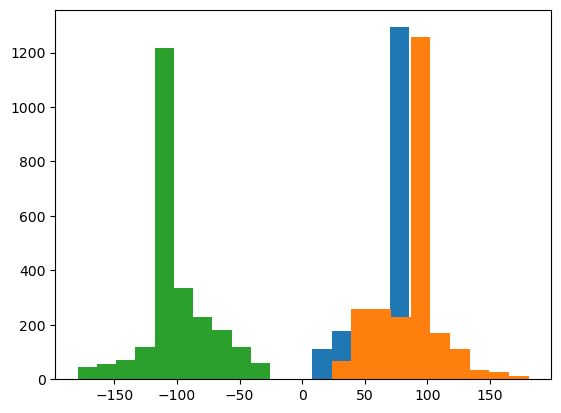

In [248]:
plt.hist(pos_sub[:,0])
plt.hist(pos_sub[:,1])
plt.hist(pos_sub[:,2])

In [258]:
knnlist

[array([   1,    3,  218,    2, 1829, 1830, 1828, 2093, 2371, 1831]),
 array([   0,    3,  218,    2, 1829, 1828, 2371, 2373, 1830,    4]),
 array([   4,    3, 1829, 1828,  189,  217,  218,    1,    0, 1786]),
 array([   2,    1,    0, 1829,  218,    4, 1828,  217,  189, 1823]),
 array([ 189,    2,  217, 1829, 1828,    3,  214,  215,  188, 1786]),
 array([197,  95,  96,   6, 177, 196,  10, 195,  97,  11]),
 array([ 10,   9,   8,  11,   5,   7, 193, 197, 212, 196]),
 array([  9,   8,   6, 212, 191, 193, 215,  11,  10, 189]),
 array([  9,   7,  10,   6,  11, 191, 193, 212,  12, 215]),
 array([  8,   7,   6, 191,  10,  11, 193, 212, 215,  12]),
 array([ 11,   6,   8,   9, 197,   5, 177,   7,  35, 191]),
 array([ 10,   8,   6,   9,   7,  35,   5,  14, 197, 191]),
 array([182, 188, 191, 187,  14,   8, 180,  10,   9,  32]),
 array([1840,   14,   16, 1841,   15, 1839, 1844, 1835, 1845,   18]),
 array([  13, 1840,   15,   20,   16,   32,   18,   19, 1841, 1835]),
 array([  16,   18,   13,   19

#### Contiguous
Save the array to adjacent memory slots like np.array?

In [ ]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
edge_index.T

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [264]:
edge_index.T.contiguous()

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [266]:
help(edge_index.T.contiguous)

Help on built-in function contiguous:

contiguous(...) method of torch.Tensor instance
    contiguous(memory_format=torch.contiguous_format) -> Tensor
    
    Returns a contiguous in memory tensor containing the same data as :attr:`self` tensor. If
    :attr:`self` tensor is already in the specified memory format, this function returns the
    :attr:`self` tensor.
    
    Args:
        memory_format (:class:`torch.memory_format`, optional): the desired memory format of
            returned Tensor. Default: ``torch.contiguous_format``.



In [261]:
next(iter(knnlist))

array([   1,    3,  218,    2, 1829, 1830, 1828, 2093, 2371, 1831])

In [262]:
len(pos_sub), len(knnlist)

(2428, 2428)

In [268]:
A = []
for knn in next(iter(knnlist)):
    A.append([0, knn])
A

[[0, 1],
 [0, 3],
 [0, 218],
 [0, 2],
 [0, 1829],
 [0, 1830],
 [0, 1828],
 [0, 2093],
 [0, 2371],
 [0, 1831]]

In [272]:
knn

1831

In [279]:
type(row[0])

numpy.int64

In [281]:
row = next(iter(knnlist))
np.column_stack((np.ones(len(row), dtype='int')*3, row))

array([[   3,    1],
       [   3,    3],
       [   3,  218],
       [   3,    2],
       [   3, 1829],
       [   3, 1830],
       [   3, 1828],
       [   3, 2093],
       [   3, 2371],
       [   3, 1831]])

In [282]:
type(np.column_stack((np.ones(len(row), dtype='int')*3, row))[5,1])

numpy.int64

In [292]:
tuples = []
for n, row in enumerate(knnlist):
    # for knn in row:
    index_tuple = np.column_stack((np.ones(len(row), dtype='int')*n, row))
    tuples.append(index_tuple)
    
edge_index = edge_index = torch.tensor(np.concatenate(tuples, axis=0), dtype=torch.long)
edge_index = edge_index.t().contiguous()
edge_index

tensor([[   0,    0,    0,  ..., 2427, 2427, 2427],
        [   1,    3,  218,  ..., 2420, 2419,  426]])

In [637]:
tuples = []
for n, row in enumerate(knnlist2):
    # for knn in row:
    index_tuple = np.column_stack((np.ones(len(row), dtype='int')*n, row))
    tuples.append(index_tuple)
    
edge_index2 = torch.tensor(np.concatenate(tuples, axis=0), dtype=torch.long)
edge_index2 = edge_index2.t().contiguous()
edge_index2

tensor([[   0,    0,    0,  ..., 1328, 1328, 1328],
        [   1, 1313,    5,  ...,  758,  854,  855]])

In [294]:
edge_index.shape

torch.Size([2, 24280])

### Subbox Data

In [498]:
scaler = MinMaxScaler() 
scaler.fit([[1,2,3, 1,2,3],[4,5,6, 1,2,3]]) 
scaler.transform([[1,2,3, 1,2,3],[4,5,6, 1,2,3]])

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.]])

In [598]:
from sklearn.preprocessing import MinMaxScaler

# X_sub = np.column_stack((subbox['v_r'], subbox['v_theta'], subbox['v_phi']))
# X_sub = np.column_stack((subbox['r'], subbox['theta'], subbox['phi']))
# X_sub = np.column_stack((subbox['r'], subbox['v_phi']))
X_sub = np.column_stack((subbox['r'], subbox['theta'], subbox['phi'], subbox['v_r'], subbox['v_theta'], subbox['v_phi']))

# Normalization
scaler = MinMaxScaler() # axis=0 default
scaler.fit(X_sub) 
# X_sub = scaler.transform(X_sub)

# pos_sub = np.column_stack((subbox['x'], subbox['y'], subbox['z']))
y_sub = np.array(subbox['group'] == 'halo_associated').astype('int')

X_sub = torch.tensor(X_sub, dtype=torch.float)
y_sub = torch.tensor(y_sub, dtype=torch.long) # not int? waste of memory

data = Data(x=X_sub, edge_index=edge_index, y=y_sub) #, pos=pos_sub # no need. we have edges
data

Data(x=[2428, 6], edge_index=[2, 24280], y=[2428])

In [638]:
from sklearn.preprocessing import MinMaxScaler

# X_sub = np.column_stack((subbox2['v_r'], subbox2['v_theta'], subbox2['v_phi']))
# X_sub = np.column_stack((subbox2['r'], subbox2['theta'], subbox2['phi']))
# X_sub = np.column_stack((subbox2['r'], subbox2['v_phi']))
X_sub = np.column_stack((subbox2['r'], subbox2['theta'], subbox2['phi'], subbox2['v_r'], subbox2['v_theta'], subbox2['v_phi']))

# Normalization
scaler = MinMaxScaler() # axis=0 default
scaler.fit(X_sub) 
# X_sub = scaler.transform(X_sub)

# pos_sub = np.column_stack((subbox2['x'], subbox2['y'], subbox2['z']))
y_sub = np.array(subbox2['group'] == 'halo_associated').astype('int')

X_sub = torch.tensor(X_sub, dtype=torch.float)
y_sub = torch.tensor(y_sub, dtype=torch.long) # not int? waste of memory

data2 = Data(x=X_sub, edge_index=edge_index2, y=y_sub) #, pos=pos_sub # no need. we have edges
data2

Data(x=[1329, 6], edge_index=[2, 13290], y=[1329])

In [494]:
data.x

tensor([[ 132.0536,    2.2942,    0.9527, -176.7945,   65.3556,  278.9025],
        [ 131.6243,    2.3029,    0.9400,   33.1349,  163.9106,  150.5900],
        [ 136.7195,    2.2986,    0.9086,   -7.9224,  165.4666,  166.0858],
        ...,
        [ 139.7058,    1.7780,    0.8868,  -29.1690,   65.6013,  163.2131],
        [ 136.3125,    1.7830,    0.8050,    7.6863,   70.0542,  238.3011],
        [ 132.0898,    1.7801,    0.7876,  -52.9488,  151.2190,  178.2499]])

In [492]:
data.x

tensor([[0.0087, 0.5204, 0.5385, 0.2499, 0.4583, 0.7395],
        [0.0016, 0.5286, 0.5263, 0.7243, 0.7412, 0.4304],
        [0.0866, 0.5245, 0.4962, 0.6315, 0.7456, 0.4678],
        ...,
        [0.1364, 0.0258, 0.4754, 0.5835, 0.4590, 0.4608],
        [0.0798, 0.0306, 0.3970, 0.6668, 0.4718, 0.6417],
        [0.0093, 0.0279, 0.3804, 0.5297, 0.7048, 0.4971]])

In [482]:
type(data.x)

torch.Tensor

In [458]:
data

Data(x=[2428, 6], edge_index=[2, 24280], y=[2428])

In [7]:
device

device(type='cpu')

Text(0.5, 0.92, 'Subbox 1')

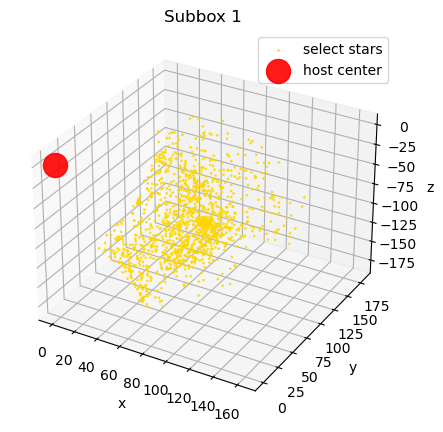

In [301]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

# stars
# m = m_star.to('Msun')[0:lim]
x = pos_sub[:,0]
y = pos_sub[:,1]
z = pos_sub[:,2]
ax.scatter(x, y, z,  # 3D scatter plot c=m, cmap="inferno",
            c='gold', s=.9, alpha=0.8, label='select stars')

# center
ax.scatter(0, 0, 0,  # 3D scatter plot c=m, cmap="inferno",
            c='r', s=300, alpha=0.9, label='host center')

l = 100
# ax.set_xlim(-l, l)
# ax.set_ylim(-l, l)
# ax.set_zlim(-l, l)
ax.legend(loc='upper right')

# ax.view_init(elev=30., azim=-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Subbox 1')

Text(0.5, 0.92, 'Subbox 2')

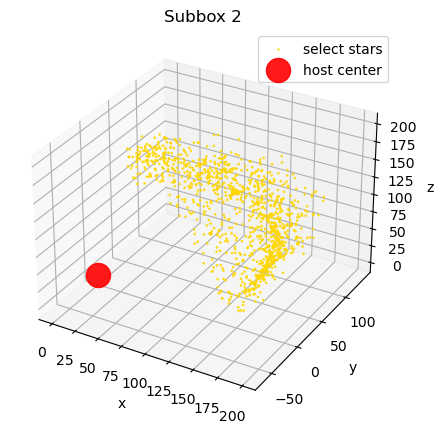

In [648]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

# stars
# m = m_star.to('Msun')[0:lim]
x = pos_sub[:,0]
y = pos_sub[:,1]
z = pos_sub[:,2]
ax.scatter(x, y, z,  # 3D scatter plot c=m, cmap="inferno",
            c='gold', s=.9, alpha=0.8, label='select stars')

# center
ax.scatter(0, 0, 0,  # 3D scatter plot c=m, cmap="inferno",
            c='r', s=300, alpha=0.9, label='host center')

l = 100
# ax.set_xlim(-l, l)
# ax.set_ylim(-l, l)
# ax.set_zlim(-l, l)
ax.legend(loc='upper right')

# ax.view_init(elev=30., azim=-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Subbox 2')

## GCN layer

In [599]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

num_hidden = 6# 2 #6 # 3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, num_hidden) #16)
        # self.conv3 = GCNConv(num_hidden, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # x = self.conv3(x, edge_index)
        # x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [330]:
data.num_node_features

6

#### train

In [739]:
n

1328

In [600]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = data.to(device) # subbox data above
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0 
    
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.97it/s]


total time 15.423424243927002 sec


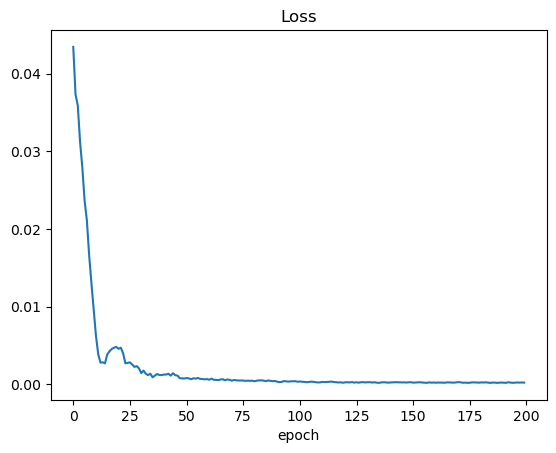

In [601]:
plt.plot(loss_); plt.title('Loss'); plt.xlabel('epoch'); plt.show()

#### eval

In [641]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred == data.y).sum()
# correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / len(data.y) # / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8015


(array([2301.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

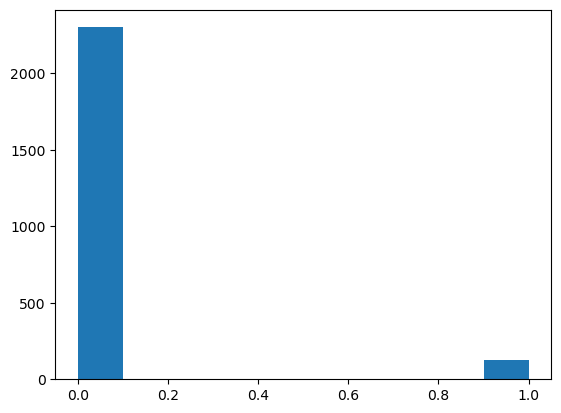

In [642]:
plt.hist(np.array(pred))

In [643]:
model.eval()
pred2 = model(data2).argmax(dim=1)
correct = (pred2 == data2.y).sum()
acc = int(correct) / len(data2.y)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8999


(array([   0.,    0.,    0.,    0.,    0., 1329.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

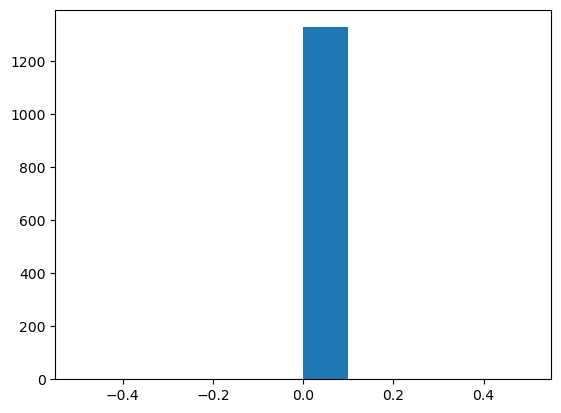

In [644]:
plt.hist(np.array(pred2))

In [645]:
sum(pred2)

tensor(0)

In [640]:
sum(data2.y)

tensor(133)

In [529]:
sum(data.y)

tensor(455)

In [511]:
sum(data.y) / len(data.y)

tensor(0.1874)

In [605]:
sum(pred)

tensor(127)

In [604]:
sum(pred & data.y)

tensor(50)

In [613]:
TPR = (pred & data.y).sum().item() / len(data.y) 
TPR

0.02059308072487644

In [614]:
FPR = (pred).sum().item()/len(data.y) - TPR
FPR

0.03171334431630972

In [450]:
model(data)

tensor([[  0.0000, -55.7157],
        [  0.0000, -49.5219],
        [  0.0000, -46.0089],
        ...,
        [  0.0000, -54.4052],
        [  0.0000, -49.3931],
        [  0.0000, -43.3256]], grad_fn=<LogSoftmaxBackward0>)

In [472]:
model(data)[2135]

tensor([-0.7659, -0.6253], grad_fn=<SelectBackward0>)

In [606]:
np.where(np.array(pred)==1)

(array([ 231,  705,  707,  708,  709,  710,  711,  716,  730,  731,  772,
         773,  774,  839,  875,  876,  877,  878,  879,  880,  881,  900,
         901,  927,  928,  929,  930,  948,  968,  969,  970, 1129, 1131,
        1132, 1133, 1134, 1135, 1136, 1156, 1216, 1217, 1218, 1219, 1220,
        1221, 1224, 1226, 1235, 1305, 1308, 1310, 1343, 1344, 1346, 1348,
        1369, 1373, 1374, 1384, 1385, 1386, 1387, 1388, 1389, 1392, 1393,
        1402, 1404, 1451, 1453, 1454, 1456, 1462, 1468, 1469, 1494, 1604,
        1605, 1606, 1618, 1624, 1637, 1638, 1639, 1640, 1641, 1642, 1663,
        1664, 1665, 1667, 1727, 1729, 1738, 1739, 1740, 1744, 1745, 1746,
        1748, 1758, 1761, 1763, 1764, 1765, 1770, 1864, 1870, 1912, 1913,
        1914, 1915, 1916, 1917, 1919, 1920, 1921, 1923, 2203, 2205, 2206,
        2207, 2208, 2209, 2214, 2215, 2415]),)

In [474]:
model(data).argmax(dim=1)

tensor([0, 0, 0,  ..., 0, 0, 0])

In [451]:
pred

tensor([0, 0, 0,  ..., 0, 0, 0])

In [518]:
sum(pred==1)

tensor(0)

In [415]:
sum(pred==1)

tensor(22)

In [ ]:
# not trained well? normalize the input

## ROC curve

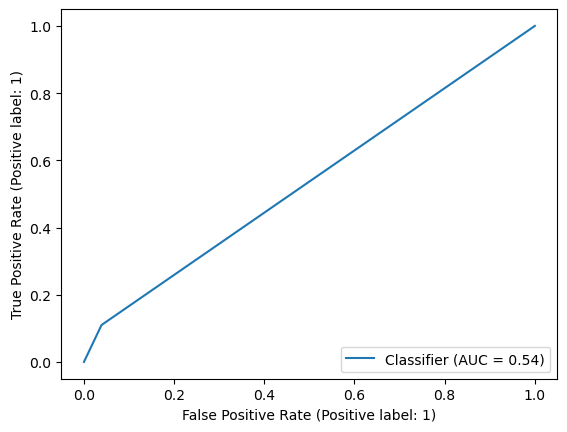

In [615]:
from sklearn import metrics


# y_pred, y_train = y_predict(trainloader) # continuous values from 0 to 1?
metrics.RocCurveDisplay.from_predictions(data.y, pred)

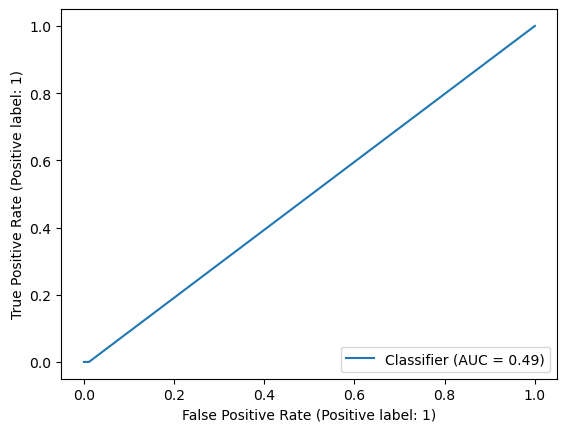

In [410]:
from sklearn import metrics


# y_pred, y_train = y_predict(trainloader) # continuous values from 0 to 1?
metrics.RocCurveDisplay.from_predictions(data.y, pred)

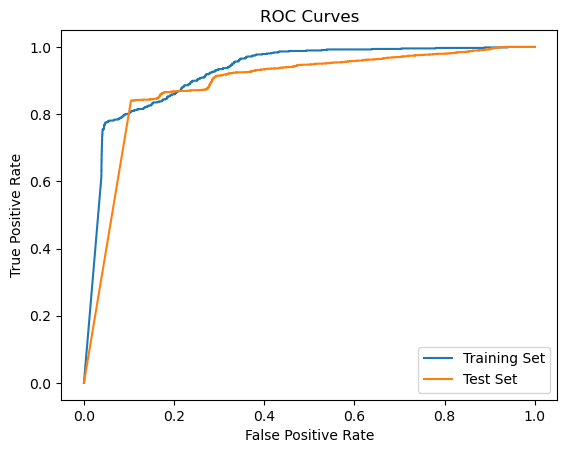

In [22]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

y_pred1, y_train = y_predict(trainloader) # continuous values from 0 to 1?
# y_pred2, y_test = y_predict(testloader) # continuous values from 0 to 1?

fpr1, tpr1, _ = roc_curve(y_train, y_pred1)
# fpr2, tpr2, _ = roc_curve(y_test, y_pred2)

auc1 = roc_auc_score(y_train, y_pred1)
# auc2 = roc_auc_score(y_test, y_pred2)

# Plot the ROC curves on the same figure
fig, ax = plt.subplots()
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label='Training Set')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label='Test Set')

# Set the plot title and axis labels
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ax.annotate(f'{auc1}', xy=(5, 0), xytext=(4, 2), fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the legend
plt.legend()

# Show the plot
plt.show()

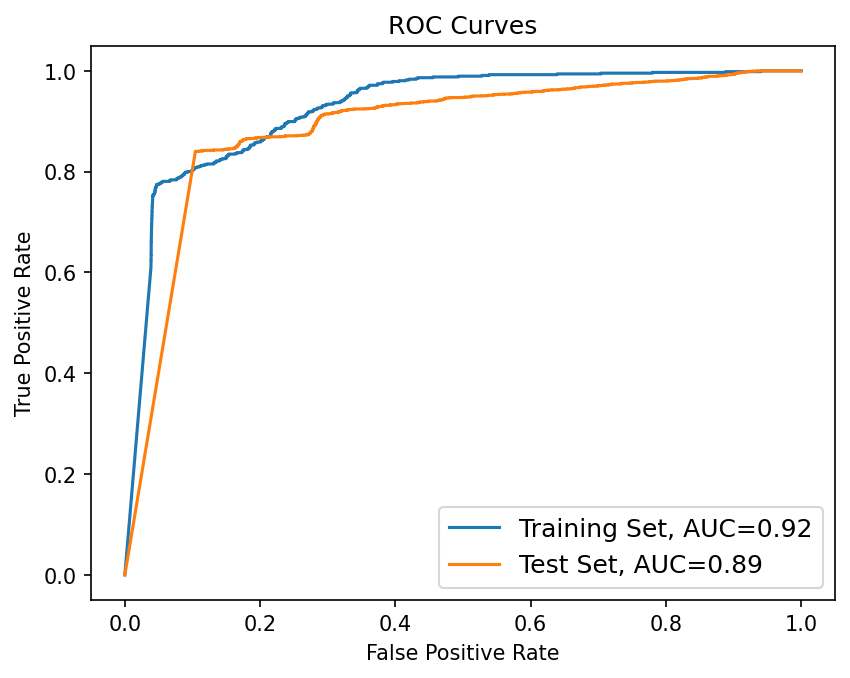

In [42]:
fig, ax = plt.subplots(dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
# RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ax.annotate(f'AUC (Training Set): {auc1:.2f}\nAUC (Test Set):      {auc2:.2f}', xy=(0.6,0.2), fontsize=12)

# Show the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

## r v_phi plot

In [617]:
pred

tensor([0, 0, 0,  ..., 0, 0, 0])

In [621]:
np.array(pred).astype('bool')

array([False, False, False, ..., False, False, False])

In [619]:
len(X_sub[pred])

2428

In [624]:
y_pred, y_true = np.array(pred).astype('bool'), np.array(data.y).astype('bool')
subbox['r'][y_true]

2141760    161.012683
2141764    160.845666
2141765    160.694289
2141766    160.562765
2141783    161.270943
              ...    
2468250    136.415625
2468251    136.854960
2468255    136.034729
2468256    135.229961
2468257    135.180317
Name: r, Length: 455, dtype: float64

Text(0, 0.5, '$v_{\\phi}$')

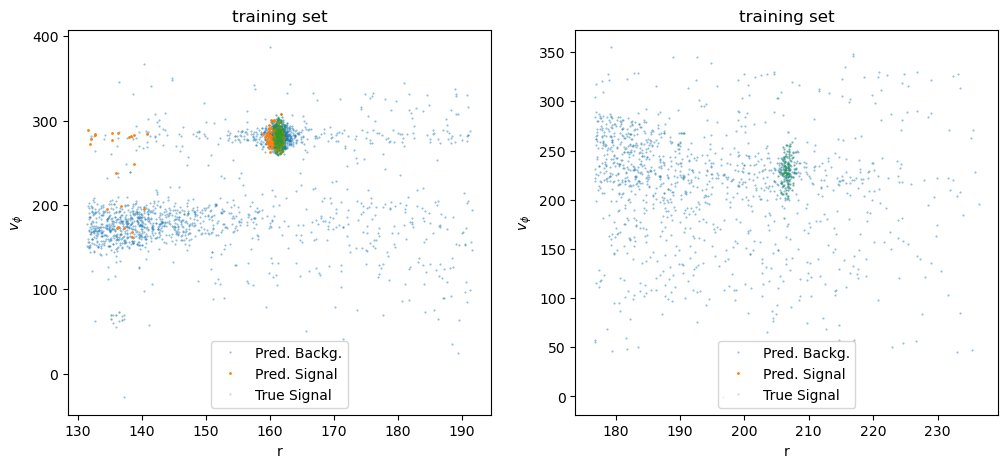

In [647]:
y_pred, y_true = np.array(pred).astype('bool'), np.array(data.y).astype('bool')
y_pred2, y_true2 = np.array(pred2).astype('bool'), np.array(data2.y).astype('bool')


fig, ax = plt.subplots(1,2, figsize=(12,5))

mask2 = ~y_pred
ax[0].plot(subbox['r'][mask2], subbox['v_phi'][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred
ax[0].plot(subbox['r'][mask2], subbox['v_phi'][mask2], '.', ms= 2, label='Pred. Signal')
mask2 = y_true
ax[0].plot(subbox['r'][mask2], subbox['v_phi'][mask2], '.', ms= 1.5, alpha=.2, label='True Signal')

ax[0].legend()
ax[0].set_title('training set')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$v_{\phi}$')
# ax[0].annotate(f'threshold = {thresh}', xy=(0.70, 0.05), xycoords='axes fraction')

mask2 = ~y_pred2
ax[1].plot(subbox2['r'][mask2], subbox2['v_phi'][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred2
ax[1].plot(subbox2['r'][mask2], subbox2['v_phi'][mask2], '.', ms= 2, label='Pred. Signal')
mask2 = y_true2
ax[1].plot(subbox2['r'][mask2], subbox2['v_phi'][mask2], '.', ms= 1.5, alpha=.2, label='True Signal')

ax[1].legend()
ax[1].set_title('training set')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$v_{\phi}$')

In [650]:
sum(y_pred2)

0

## SciPy cKDTree

https://velog.io/@stripe2933/scipy-ckdtree-compare-with-numpy-method

## Loader

https://github.com/PabloVD/HaloGraphNet/blob/master/Source/load_data.py

In [ ]:
from torch_geometric.data import Data, DataLoader


# One .py

In [725]:
# m12f GNN
######### ######### ######### ######### ######### ######### ######### #######79 

import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import MinMaxScaler

# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')
# One liner:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Data & Graph
df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'],
    df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')

edge_index = np.genfromtxt('/data1/dhhyun/m12f_graph_k10.csv', delimiter=',', dtype='int')
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_index = edge_index.t().contiguous()

# Normalization
scaler = MinMaxScaler() # axis=0 default
scaler.fit(X) 
X = scaler.transform(X)

# Train, Val, Test mask
train_mask = np.zeros(len(y), dtype='int')
num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
selected_indices = np.random.choice(train_mask, size=num_samples, replace=False)
train_mask[selected_indices] = 1
np.savetxt('/data1/dhhyun/train_mask.csv', train_mask, delimiter=',', fmt='%d')
test_mask = torch.tensor(~train_mask, dtype=torch.bool)
train_mask = torch.tensor(train_mask, dtype=torch.bool)

# Data Object
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long) # not int32
data = Data(x=X, edge_index=edge_index, y=y,
            train_mask=train_mask, test_mask=test_mask)#, pos=pos_sub # no need; we have edges already


# GCN Layer
num_hidden = 4 #6 #2 #3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, num_hidden)
        # self.conv3 = GCNConv(num_hidden, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # x = self.conv3(x, edge_index)
        # x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)


# Train
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0 
    
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/3600} hrs' if t>60*60 else f'{t/60} min')

np.savetxt('/data1/dhhyun/loss.csv', loss_, delimiter=',')
torch.save(model.state_dict(), '/data1/dhhyun/model.pth')
    
    
# Evaluation
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')


CUDA Not Available


/tmp/ipykernel_61746/953577169.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_mask = torch.tensor(~train_mask, dtype=torch.bool)
  2%|█▋                                                                                 | 4/200 [00:16<13:14,  4.05s/it]


KeyboardInterrupt: 

In [737]:
train_mask = np.zeros(len(y), dtype='int')
num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
selected_indices = np.random.choice(train_mask, size=num_samples, replace=False)
train_mask[selected_indices] = 1

In [738]:
train_mask

array([1, 0, 0, ..., 0, 0, 0])

In [732]:
np.where(selected_indices.astype('int')==1)

(array([], dtype=int64),)

In [723]:
data.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

In [ ]:


outdir = 'data1/dhhyun'

# m12f Conti. Test

In [771]:
# m12f GNN
######### ######### ######### ######### ######### ######### ######### #######79 

import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import MinMaxScaler

# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')
# One liner:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Data & Graph
df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'],
    df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')

edge_index = np.genfromtxt('/data1/dhhyun/m12f_graph_k10.csv', delimiter=',', dtype='int')
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_index = edge_index.t().contiguous()

# Normalization
scaler = MinMaxScaler() # axis=0 default
scaler.fit(X) 
X = scaler.transform(X)

# Train, Val, Test mask
train_mask = np.zeros(len(y), dtype='int')
num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
selected_indices = np.random.choice(train_mask, size=num_samples, replace=False)
train_mask[selected_indices] = 1
np.savetxt('/data1/dhhyun/train_mask.csv', train_mask, delimiter=',', fmt='%d')
test_mask = torch.tensor(~train_mask, dtype=torch.bool)
train_mask = torch.tensor(train_mask, dtype=torch.bool)

# Data Object
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float) # not int32 #################### originally torch.long for class identification
data = Data(x=X, edge_index=edge_index, y=y,
            train_mask=train_mask, test_mask=test_mask)#, pos=pos_sub # no need; we have edges already


# GCN Layer
num_hidden = 4 #6 #2 #3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)
        self.conv3 = GCNConv(2, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training) # self.training?
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)

        # return F.log_softmax(x, dim=1)
        
        m = torch.nn.Sigmoid()
        return m(x).squeeze() ##############


# Train
model = GCN().to(device)
data = data.to(device)
criterion = torch.nn.BCELoss() ###############
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
# n = len(trainloader) # for n batches
n = 1

model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0 
    
    optimizer.zero_grad()
    out = model(data)
    # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    ###############
    out_T = out[data.train_mask].t()[0]
    loss = criterion(out_T, data.y[data.train_mask]) ###############
    ##############
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

np.savetxt('/data1/dhhyun/loss.csv', loss_, delimiter=',')
torch.save(model.state_dict(), '/data1/dhhyun/model.pth')
    
    
# Evaluation
model.eval()
# pred = model(data).argmax(dim=1)
pred = model(data) #####################

pred_save = pred.cpu().detach().numpy()
np.savetxt('/data1/dhhyun/pred.csv', pred_save, delimiter=',', fmt='%d')

thresh = np.percentile(pred_save, 99)
pred_int = np.where(pred_save <= thresh, 0, 1)
correct = (pred_int[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

CUDA Not Available


100%|████████████████████████████████████████████████████████████████████| 200/200 [12:59<00:00,  3.90s/it]


total time 12.99543000459671 min


AttributeError: 'bool' object has no attribute 'sum'

In [774]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [754]:
out

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.5000],
        [0.5000],
        [0.4996]], grad_fn=<SigmoidBackward0>)

In [757]:
out.T.contiguous()

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.4996]],
       grad_fn=<PermuteBackward0>)

In [761]:
out.t()[0]

tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.4996],
       grad_fn=<SelectBackward0>)

In [755]:
data.y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [763]:
torch.tensor(data.y, dtype=torch.float)

/tmp/ipykernel_61746/1796458070.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(data.y, dtype=torch.float)


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [764]:
loss = criterion(out[data.train_mask].T[0], torch.tensor(data.y[data.train_mask], dtype=torch.float)) ###############

/tmp/ipykernel_61746/2649592339.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(out[data.train_mask].T[0], torch.tensor(data.y[data.train_mask], dtype=torch.float)) ###############


In [765]:
loss

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [766]:
data.train_mask

tensor([ True, False, False,  ..., False, False, False])

# Conti test Benchmark Dataset

In [859]:
# m12f GNN
######### ######### ######### ######### ######### ######### ######### #######79 

import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import MinMaxScaler
from torch_geometric.datasets import GNNBenchmarkDataset


# use GPUs if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'{device}', 'available')

# Load Data & Graph
dataset = GNNBenchmarkDataset(root='/data1/dhhyun/PyG', name='PATTERN')


# Normalization
# scaler = MinMaxScaler() # axis=0 default
# scaler.fit(X) 
# X = scaler.transform(X)

# Train, Val, Test mask
trainloader = DataLoader(dataset, batch_size=32, shuffle=True)
# later consider training/test mask

# train_mask = np.zeros(len(y), dtype='int')
# num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
# selected_indices = np.random.choice(train_mask, size=num_samples, replace=False)
# train_mask[selected_indices] = 1
# np.savetxt('/data1/dhhyun/train_mask.csv', train_mask, delimiter=',', fmt='%d')
# test_mask = torch.tensor(~train_mask, dtype=torch.bool)
# train_mask = torch.tensor(train_mask, dtype=torch.bool)

# Data Object
# X = torch.tensor(X, dtype=torch.float)
# y = torch.tensor(y, dtype=torch.float) # not int32 #################### originally torch.long for class identification
# data = Data(x=X, edge_index=edge_index, y=y,
#             train_mask=train_mask, test_mask=test_mask)#, pos=pos_sub # no need; we have edges already


# GCN Layer
num_node_features = dataset[0].num_node_features  #data.num_node_features
num_hidden = 3 ###########################

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)
        self.conv3 = GCNConv(2, 1) ############### Added

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training) # self.training?
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)

        # return F.log_softmax(x, dim=1)
        m = torch.nn.Sigmoid()
        return m(x)


# Train
model = GCN().to(device)
# dataset = dataset.to(device) ### doesn't work
# data = data.to(device) ######################################################## Where for batches?
criterion = torch.nn.BCELoss() ###############
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
n = len(trainloader) # for n batches
# n = 1

model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0
    
    for data in trainloader:
        data = data.to(device) ###########################################################
        optimizer.zero_grad()
        out = model(data)
        # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        ###############
        # out_T = out[data.train_mask].t()[0]
        # loss = criterion(out_T, data.y[data.train_mask]) ###############
        out_T = out.t()[0]
        y_true = torch.tensor(data.y.clone().detach(), dtype=torch.float)
        loss = criterion(out_T, y_true)
        ##############
        loss.backward()
        optimizer.step()

        running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

# np.savetxt('/data1/dhhyun/loss.csv', loss_, delimiter=',')
# torch.save(model.state_dict(), '/data1/dhhyun/model.pth')
    
    
# Evaluation
model.eval()
# pred = model(data).argmax(dim=1)
pred = model(data) #####################

pred_save = pred.cpu().detach().numpy()
# np.savetxt('/data1/dhhyun/pred.csv', pred_save, delimiter=',')#, fmt='%d')

# thresh = np.percentile(pred_save, 99)
# pred_int = np.where(pred_save <= thresh, 0, 1)
# correct = (pred_int[data.test_mask] == data.y[data.test_mask]).sum()
# acc = int(correct) / int(data.test_mask.sum())
# print(f'Accuracy: {acc:.4f}')

cpu available


  0%|                                                                              | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_61746/265724429.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(data.y.clone().detach(), dtype=torch.float)
  0%|                                                                              | 0/200 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [841]:
out

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [844]:
out.t()

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
       grad_fn=<TBackward0>)

In [846]:
out.t()[0]

tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
       grad_fn=<SelectBackward0>)

In [842]:
out_T

tensor([0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
       grad_fn=<SelectBackward0>)

In [847]:
out_T.size()

torch.Size([3512])

In [843]:
data.y

tensor([0, 0, 0,  ..., 1, 0, 1])

In [851]:
torch.tensor(data.y.clone().detach(), dtype=torch.float)

/tmp/ipykernel_61746/2125810895.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(data.y.clone().detach(), dtype=torch.float)


tensor([0., 0., 0.,  ..., 1., 0., 1.])

# Save and Load

In [ ]:
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))

In [ ]:
# Define the model architecture (must be the same as the saved model)
class Net(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(Net, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

# Instantiate the model with the necessary parameters
model = Net(num_node_features, num_classes)

# Now load the state dict
model.load_state_dict(torch.load('model.pth'))

## Loading m12f_GNN.py

In [740]:
model.load_state_dict(torch.load('/data1/dhhyun/model.pth'))

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

#### Rerun/Reload 20230907
feedme.py

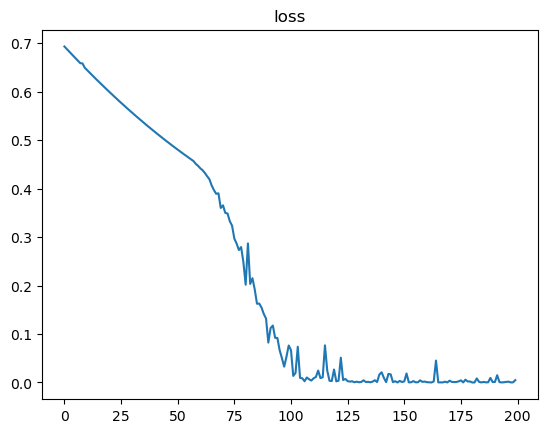

/tmp/ipykernel_446205/3178529656.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


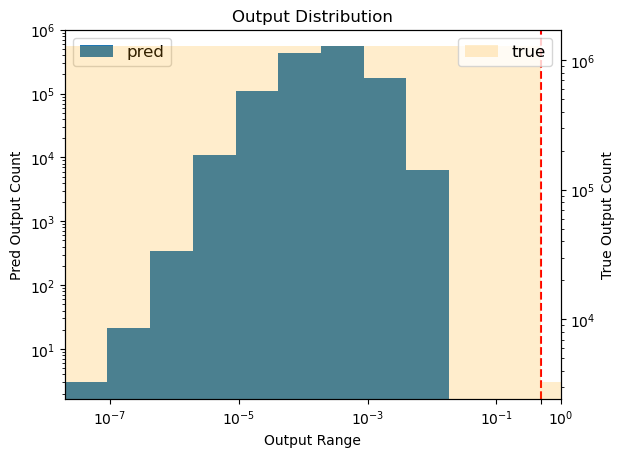

In [89]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.set_title('Output Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12)
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

In [84]:
ax.get_xticklabels()

[Text(1e-11, 0, '$\\mathdefault{10^{-11}}$'),
 Text(1e-09, 0, '$\\mathdefault{10^{-9}}$'),
 Text(1e-07, 0, '$\\mathdefault{10^{-7}}$'),
 Text(1e-05, 0, '$\\mathdefault{10^{-5}}$'),
 Text(0.001, 0, '$\\mathdefault{10^{-3}}$'),
 Text(0.1, 0, '$\\mathdefault{10^{-1}}$'),
 Text(0.5, 0, ''),
 Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
 Text(10.0, 0, '$\\mathdefault{10^{1}}$'),
 Text(1000.0, 0, '$\\mathdefault{10^{3}}$')]

In [80]:
new_ticks

[1e-11, 1e-09, 1e-07, 1e-05, 0.001, 0.1, 0.5, 1.0, 10.0, 1000.0]

In [33]:
len(pred_true) / pred_true.sum() 

391.0336083104186

In [93]:
pred_true[train_mask]

array([0])

In [96]:
train_mask.astype('int').sum(), test_mask.astype('int').sum()

(1, 1279852)

/home/dhhyun/anaconda3/envs/yttest2/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


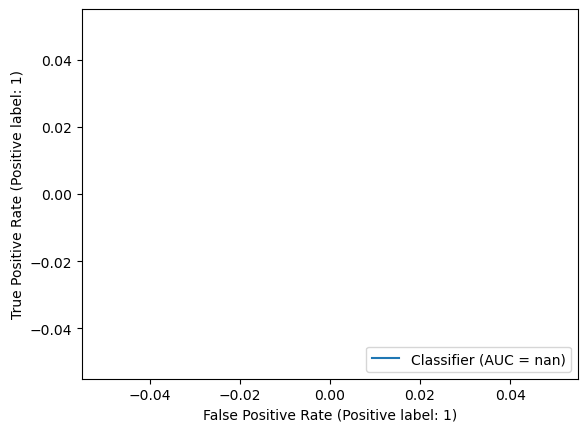

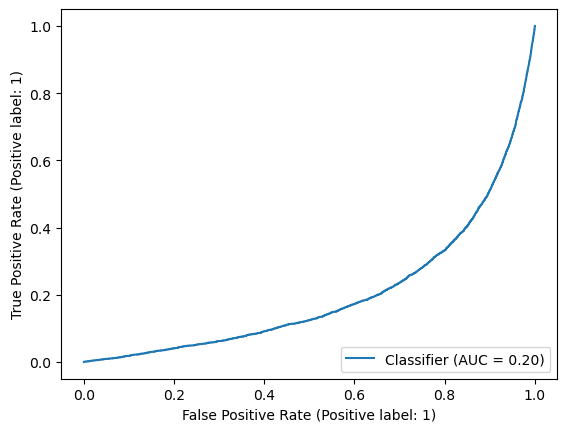

In [92]:
from sklearn import metrics
metrics.RocCurveDisplay.from_predictions(pred_true[train_mask], pred[train_mask])
metrics.RocCurveDisplay.from_predictions(pred_true[test_mask], pred[test_mask])

#### Retrieving Model

In [34]:
num_hidden = 4 #6 #2 #3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(6, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)
        self.conv3 = GCNConv(2, 1) ############### Added

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training) # self.training?
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)

        # return F.log_softmax(x, dim=1)
        m = torch.nn.Sigmoid()
        return m(x)


# Instantiate the model with the necessary parameters
model = GCN()#.to(device)

# Now load the state dict
model.load_state_dict(torch.load('/data1/dhhyun/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

### Feedme Refined

In [120]:
# m12f GNN
######### ######### ######### ######### ######### ######### ######### #######79 

import os
from time import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import MinMaxScaler
import random


# Fix Random Seed
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
np.random.seed(seed) # Numpy module.
random.seed(seed) # Python random module.
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True


# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')
# One liner:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Data & Graph
df_star_sel = pd.read_csv('/data1/dhhyun/PyG/df_star_sel.csv', index_col=0)
X = np.column_stack((df_star_sel['r'], df_star_sel['theta'], df_star_sel['phi'],
    df_star_sel['v_r'], df_star_sel['v_theta'], df_star_sel['v_phi']))
y = np.array(df_star_sel['group'] == 'halo_associated').astype('int')

edge_index = np.genfromtxt('/data1/dhhyun/m12f_graph_k10.csv', delimiter=',', dtype='int')
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_index = edge_index.t().contiguous()

# Normalization
scaler = MinMaxScaler() # axis=0 default
scaler.fit(X) 
X = scaler.transform(X)

# Train, Val, Test mask
train_mask = np.zeros(len(y), dtype='int')
num_samples = int(0.9 * len(y)) #later revise to be 8:1:1
selected_indices = np.random.choice(np.arange(len(y)), size=num_samples, replace=False)
train_mask[selected_indices] = 1
np.savetxt('/data1/dhhyun/train_mask.csv', train_mask, delimiter=',', fmt='%d')
test_mask = torch.tensor(~train_mask, dtype=torch.bool)
train_mask = torch.tensor(train_mask, dtype=torch.bool)

# Data Object
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float) # not int32 #################### originally torch.long for class identification
data = Data(x=X, edge_index=edge_index, y=y,
            train_mask=train_mask, test_mask=test_mask)#, pos=pos_sub # no need; we have edges already


# GCN Layer
num_hidden = 4 #6 #2 #3

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, num_hidden)
        self.conv2 = GCNConv(num_hidden, 2) #data.num_classes)
        self.conv3 = GCNConv(2, 1) ############### Added

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training) # self.training?
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)

        # return F.log_softmax(x, dim=1)
        m = torch.nn.Sigmoid()
        return m(x)


# Train
model = GCN().to(device)
data = data.to(device)
criterion = torch.nn.BCELoss() ###############
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
start = time()

loss_ = []
# n = len(trainloader) # for n batches
n = 1

model.train()
for epoch in tqdm(range(200)):
    running_loss = 0.0 
    
    optimizer.zero_grad()
    out = model(data)
    # loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    ###############
    out_T = out[data.train_mask].t()[0]
    loss = criterion(out_T, data.y[data.train_mask]) ###############
    ##############
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item() # for the case using trainloader inside a for loop
    loss_.append(running_loss/n) # MSE(Mean Squared Error)
    
t = (time()-start)
print('total time', f'{t/60} min' if t>60 else f'{t} sec')

np.savetxt('/data1/dhhyun/loss.csv', loss_, delimiter=',')
torch.save(model.state_dict(), '/data1/dhhyun/model.pth')
    
    
# Evaluation
model.eval()
# pred = model(data).argmax(dim=1)
pred = model(data) #####################

pred_save = pred.cpu().detach().numpy()
np.savetxt('/data1/dhhyun/pred.csv', pred_save, delimiter=',')#, fmt='%d')
pred_true_save = data.y.cpu().detach().numpy()
np.savetxt('/data1/dhhyun/pred_true.csv', pred_true_save, delimiter=',', fmt='%d')


thresh = np.percentile(pred_save, 99)
pred_int = np.where(pred_save <= thresh, 0, 1)
correct = (pred_int[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

CUDA Not Available


  1%|▊                                                                                  | 2/200 [00:11<19:10,  5.81s/it]


KeyboardInterrupt: 

### ReRun : Mistake Corrected

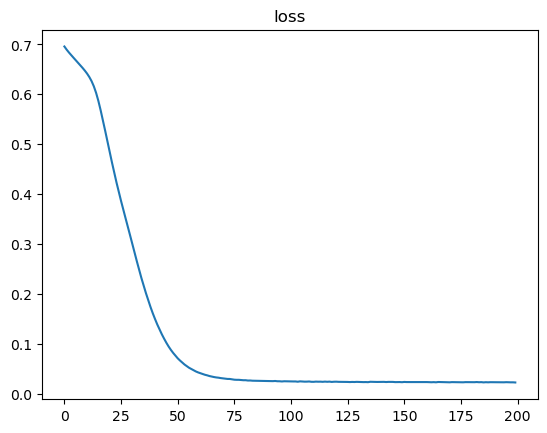

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


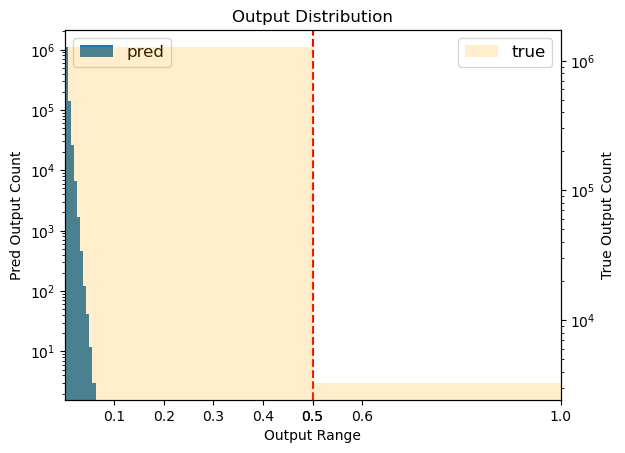

In [132]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

In [136]:
len(pred)/pred.sum()

294.5867935690326

In [135]:
len(pred_true)/pred_true.sum()

391.0336083104186

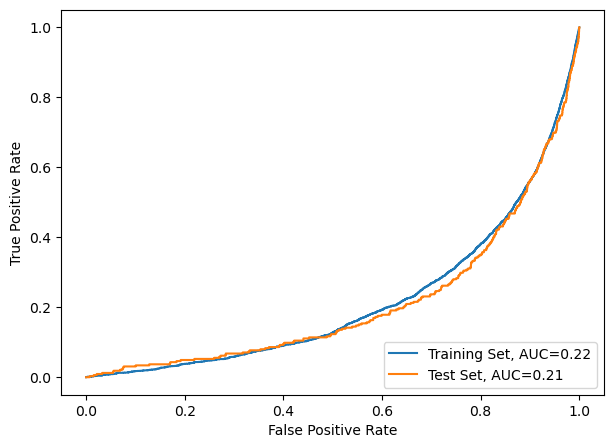

In [127]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

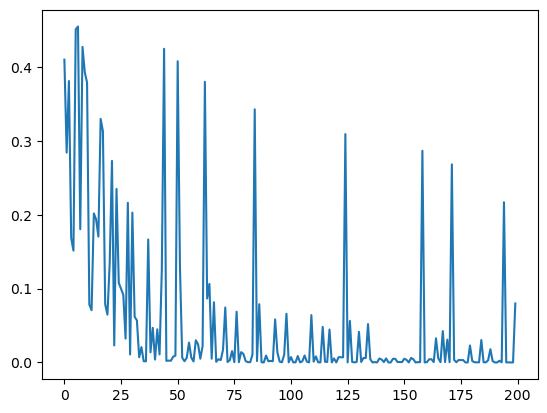

In [746]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)

In [748]:
train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
train_mask, test_mask

(array([ True, False, False, ..., False, False, False]),
 array([False,  True,  True, ...,  True,  True,  True]))

In [750]:
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='int')
pred

array([0, 0, 0, ..., 0, 0, 0])

In [751]:
pred.sum()

0

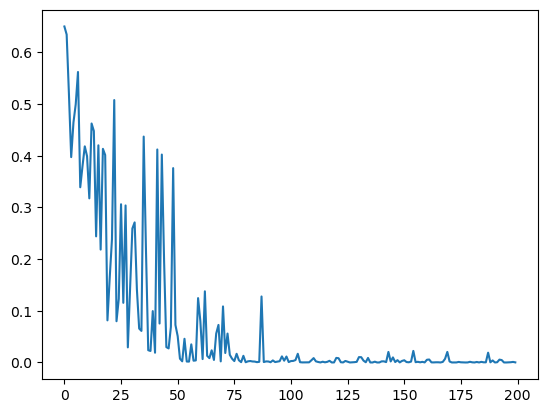

In [752]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)

### m12f_GNN_conti

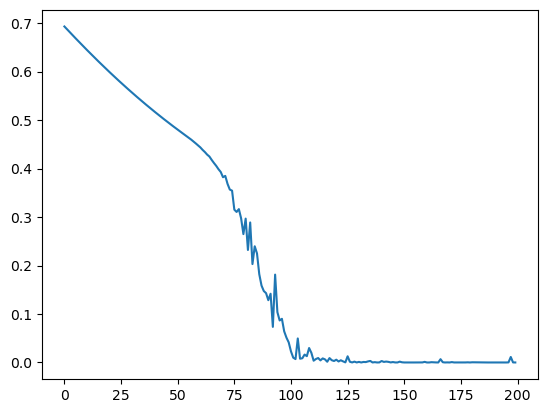

In [767]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)

In [768]:
train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
train_mask, test_mask

(array([ True, False, False, ..., False, False, False]),
 array([False,  True,  True, ...,  True,  True,  True]))

In [775]:
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',')#, dtype='int')
pred

array([2.08703117e-04, 2.09046659e-04, 2.10535683e-04, ...,
       9.07870708e-05, 1.32194051e-04, 4.14000038e-04])

In [776]:
pred.sum()

310.61876956714417

(array([1.26256e+06, 1.44800e+04, 2.09500e+03, 4.84000e+02, 1.54000e+02,
        5.70000e+01, 1.20000e+01, 9.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([2.86541735e-10, 1.86227400e-03, 3.72454770e-03, 5.58682141e-03,
        7.44909512e-03, 9.31136883e-03, 1.11736425e-02, 1.30359163e-02,
        1.48981900e-02, 1.67604637e-02, 1.86227374e-02]),
 <BarContainer object of 10 artists>)

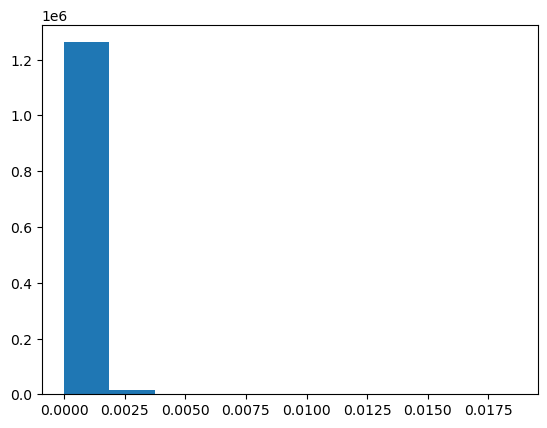

In [777]:
plt.hist(pred)

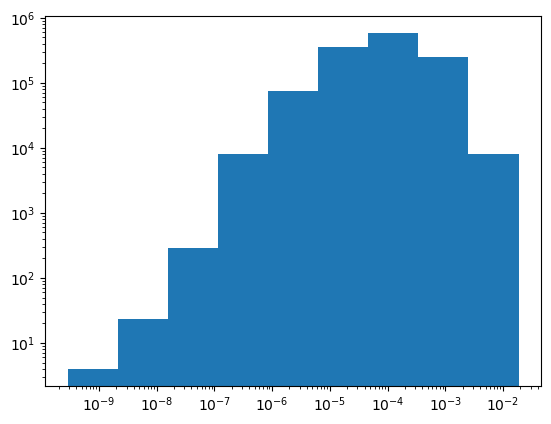

In [786]:
plt.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10))
plt.xscale('log')
plt.yscale('log')

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

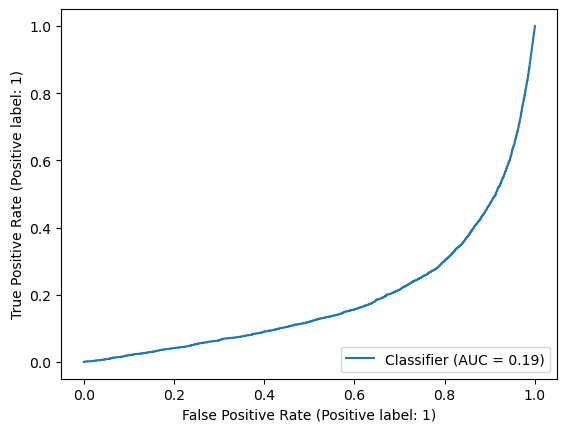

In [780]:
y_test = np.array(data.y)
y_pred = pred
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

### GNN_conti

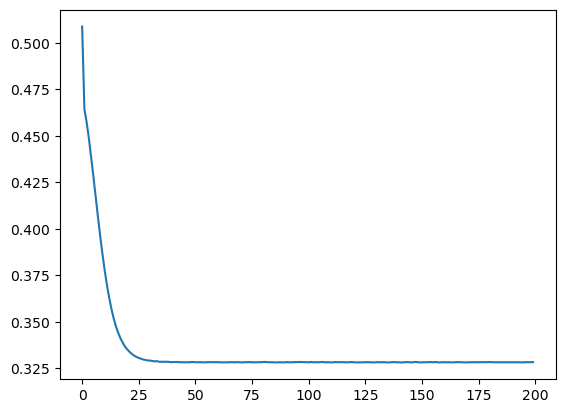

In [863]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)

In [864]:
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',')#, dtype='int')
pred

array([0.10885703, 0.40089756, 0.17520183, ..., 0.0700284 , 0.10607727,
       0.53283679])

In [865]:
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',')#, dtype='int')
pred_true

array([0., 1., 0., ..., 0., 0., 0.])

In [866]:
len(pred)

1740

(array([345., 596., 331., 206., 114.,  74.,  44.,  16.,  11.,   3.]),
 array([0.00884969, 0.08530923, 0.16176877, 0.2382283 , 0.31468784,
        0.39114738, 0.46760692, 0.54406646, 0.62052599, 0.69698553,
        0.77344507]),
 <BarContainer object of 10 artists>)

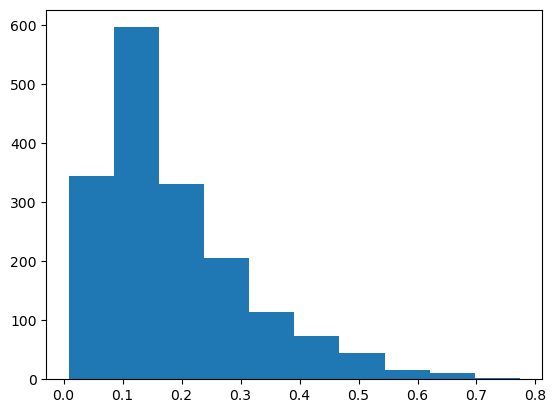

In [867]:
plt.hist(pred)
# plt.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10))
# plt.xscale('log')
# plt.yscale('log')

(array([1443.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         297.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

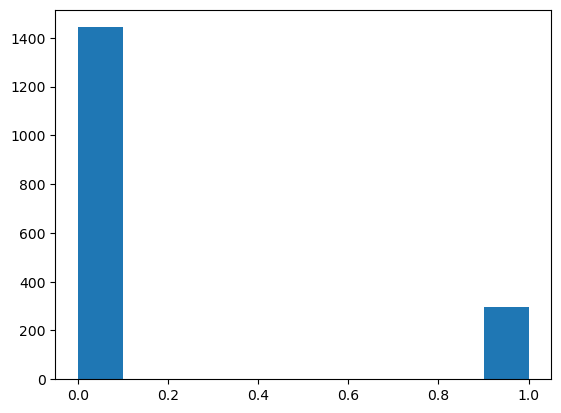

In [869]:
plt.hist(pred_true)

In [889]:
np.array(pred_true, dtype='int')

array([0, 1, 0, ..., 0, 0, 0])

In [890]:
np.array(pred_true, dtype='bool')

array([False,  True, False, ..., False, False, False])

In [892]:
(~np.array(pred_true, dtype='bool')).sum()

1443

In [893]:
pred_true.sum()

297.0

In [891]:
pred_true.sum()/(~np.array(pred_true, dtype='bool')).sum()

0.20582120582120583

Text(0, 0.5, 'Count')

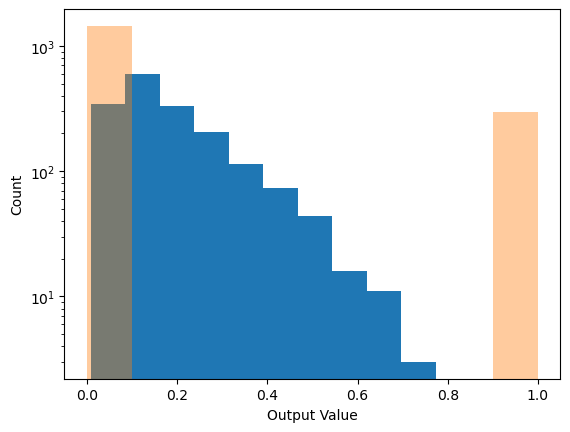

In [877]:
plt.hist(pred, label='Pred')
plt.hist(pred_true, alpha=0.4, label='True')
plt.yscale('log')
plt.xlabel('Output Value')
plt.ylabel('Count')

In [870]:
pred_true.sum()/len(pred_true)

0.1706896551724138

In [861]:
len(batch.y)

1189120

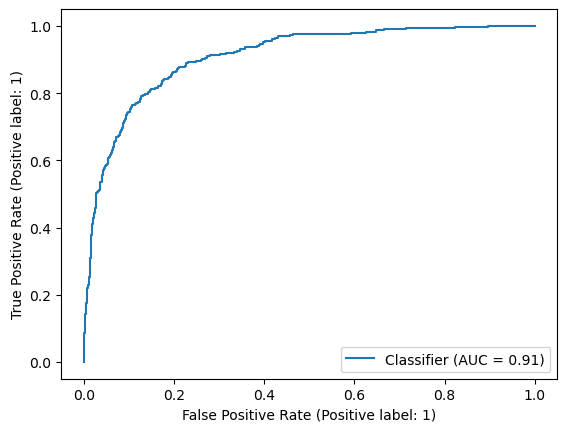

In [868]:
y_test = pred_true
y_pred = pred
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

## Weighted BCELoss, 1 391

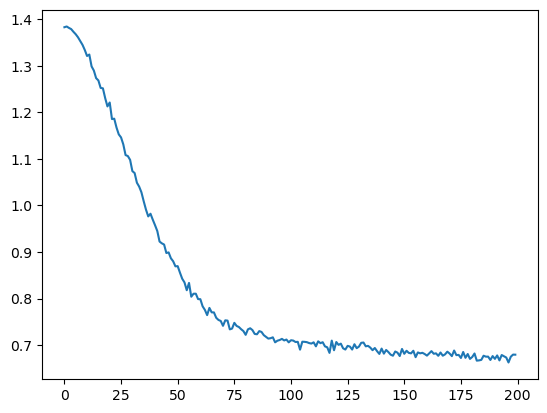

In [142]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)

In [143]:
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',')#, dtype='int')
pred

array([0.18995588, 0.1974732 , 0.1679946 , ..., 0.27778587, 0.27057648,
       0.33800396])

In [144]:
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',')#, dtype='int')
pred_true

array([0., 0., 0., ..., 0., 0., 0.])

Text(0, 0.5, 'Count')

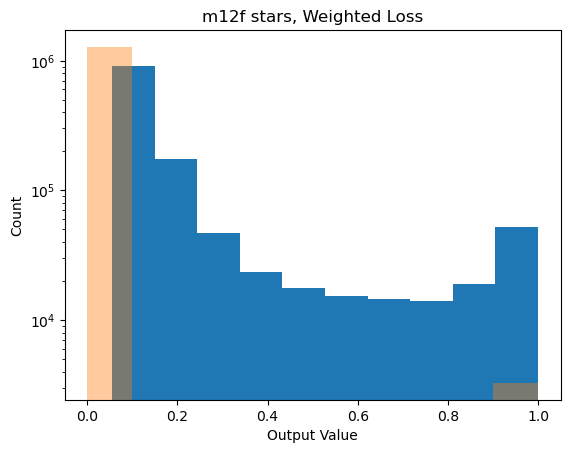

In [148]:
plt.hist(pred, label='Pred')
plt.hist(pred_true, alpha=0.4, label='True')
plt.title('m12f stars, Weighted Loss')
plt.yscale('log')
plt.xlabel('Output Value')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

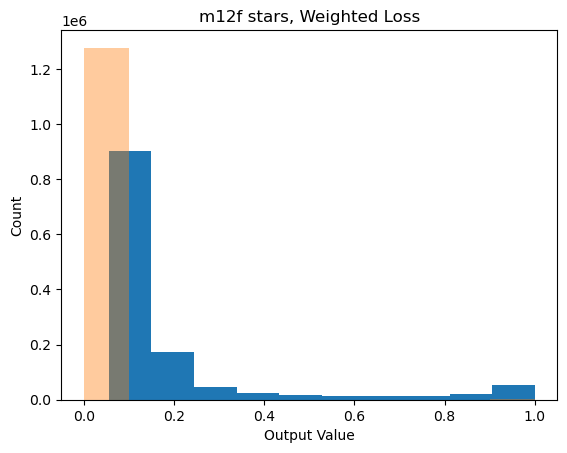

In [147]:
plt.hist(pred, label='Pred')
plt.hist(pred_true, alpha=0.4, label='True')
plt.title('m12f stars, Weighted Loss')
# plt.yscale('log')
plt.xlabel('Output Value')
plt.ylabel('Count')

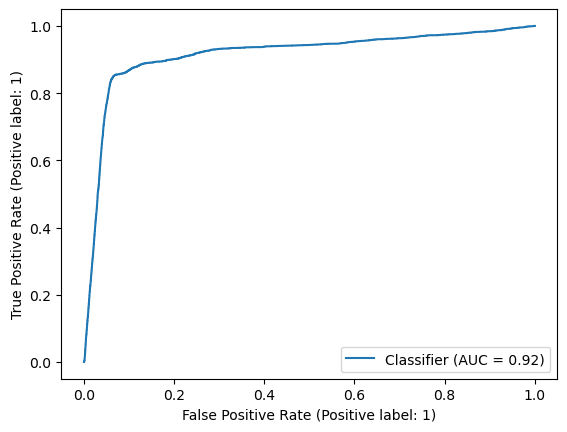

In [146]:
y_test = pred_true
y_pred = pred
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

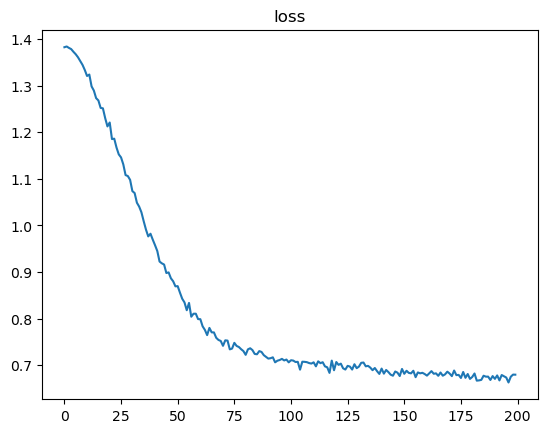

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


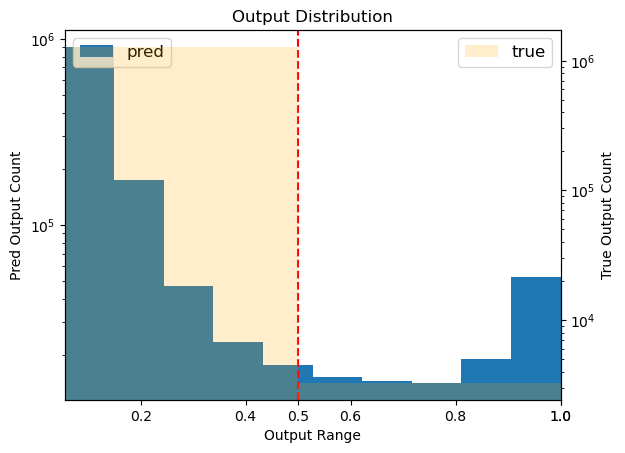

In [149]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

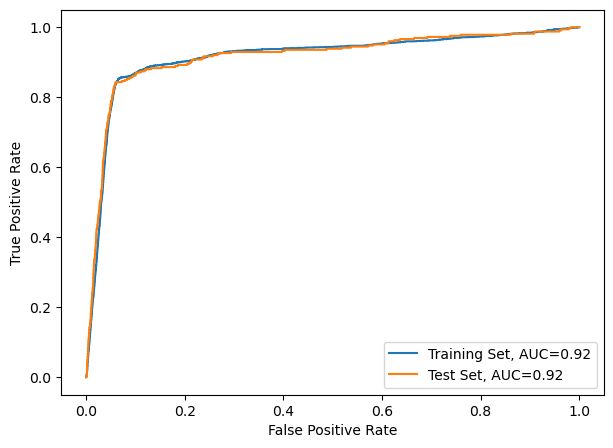

In [150]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

Saved as loss_391.csv and pred_391.csv

## Weighted, 1:1

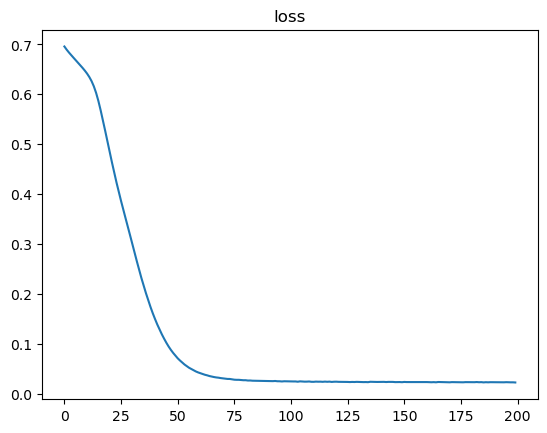

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


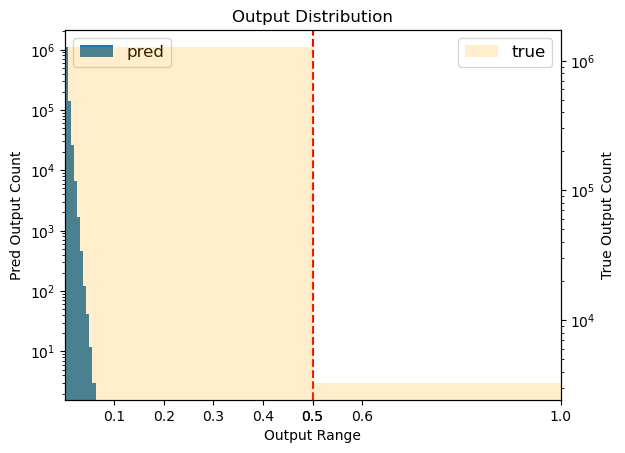

In [151]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

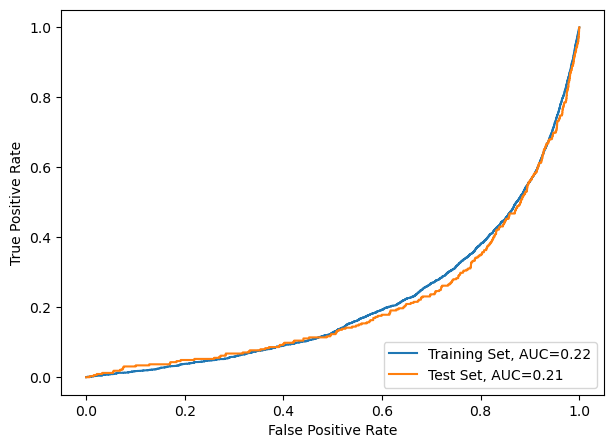

In [152]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

## Weighted, 1:10

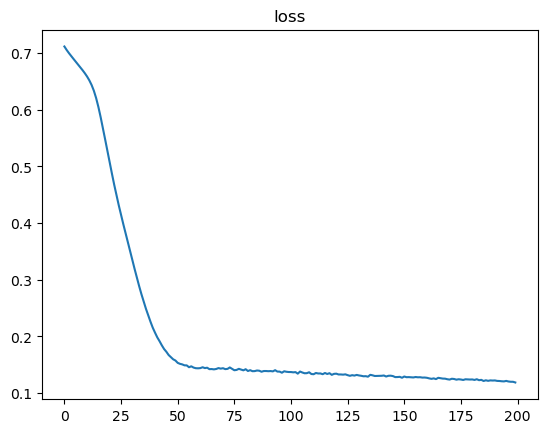

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


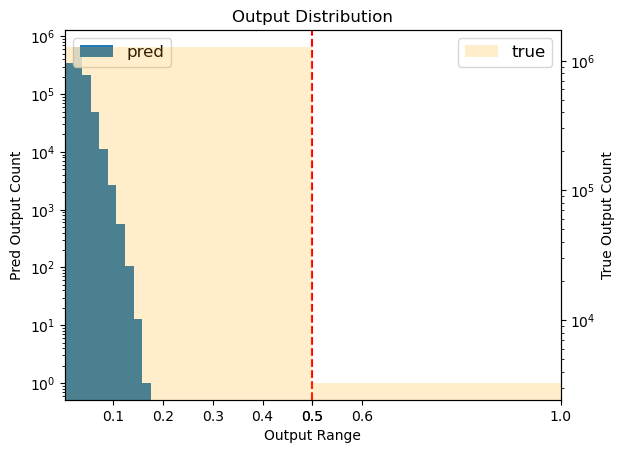

In [153]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

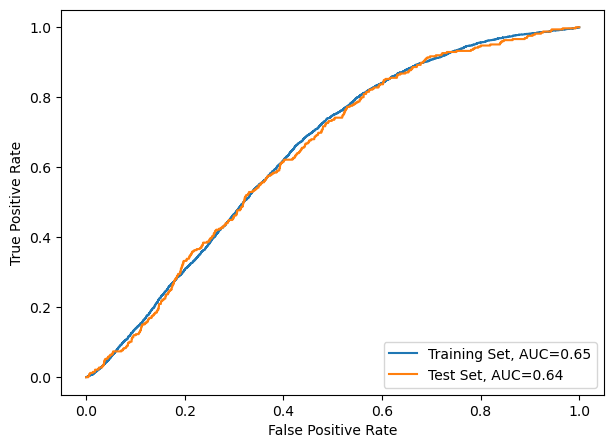

In [154]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

## Weighted, 1:100

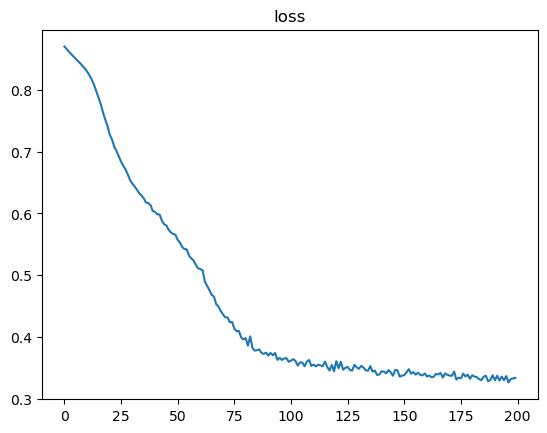

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


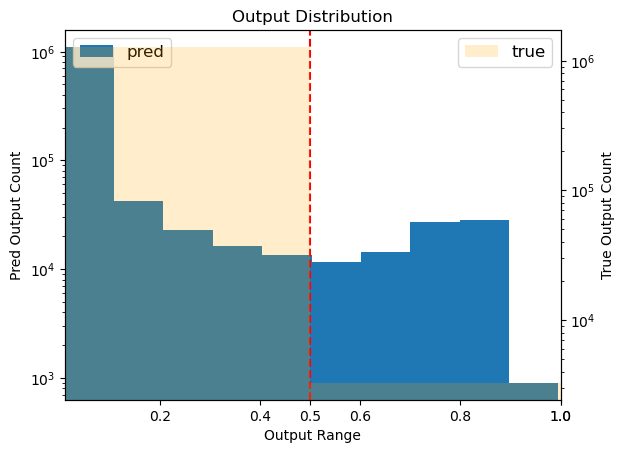

In [155]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

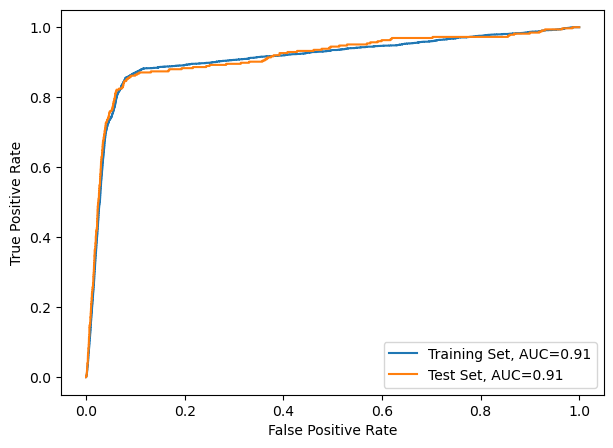

In [156]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

## Weighted, 1:1000

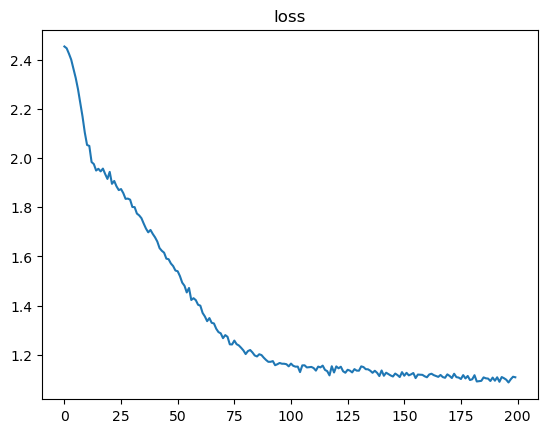

/tmp/ipykernel_446205/3934835839.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0.5],["0.5"])


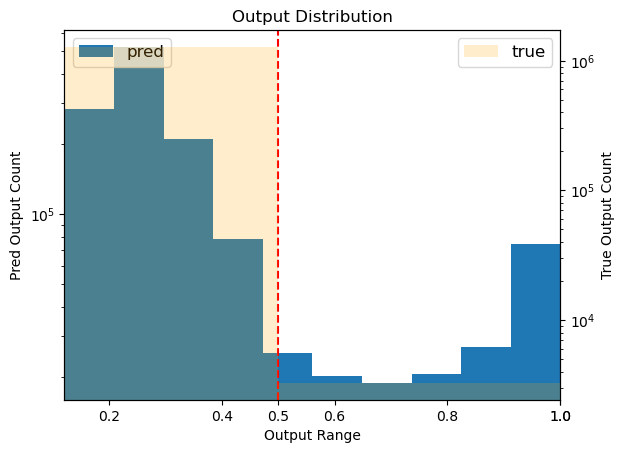

In [157]:
loss_ = np.loadtxt('/data1/dhhyun/loss.csv', delimiter=',')
plt.plot(loss_)
plt.title('loss')
plt.show()

train_mask = np.loadtxt('/data1/dhhyun/train_mask.csv', delimiter=',', dtype='int').astype('bool')
test_mask = ~train_mask
pred = np.loadtxt('/data1/dhhyun/pred.csv', delimiter=',', dtype='float')
pred_true = np.loadtxt('/data1/dhhyun/pred_true.csv', delimiter=',', dtype='int')

fig, ax = plt.subplots()
# ax.hist(pred, bins=np.logspace(np.log10(min(pred)), np.log10(max(pred)), 10), label='pred')
ax.hist(pred, label='pred')
ax.set_title('Output Distribution')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(0.5, color='r', linestyle='--')#, label='0.5')
ax.legend(fontsize=12, loc='upper left')
new_ticks = sorted(np.append(ax.get_xticks(), [0.5, 1]))
ax.set_xticks(new_ticks)
ax.set_xticks([0.5],["0.5"])
# ax.set_xticklabels([str(tick) for tick in new_ticks])
# ax.set_xticklabels([0.5])
ax.set_xlim((min(pred),1))
ax.set_xlabel('Output Range')
ax.set_ylabel('Pred Output Count')

ax2 = ax.twinx()
ax2.hist(pred_true, bins=[0,0.5,1], color='orange', alpha=0.2, label='true')
ax2.set_yscale('log')
# ax2.set_ylim(0, 10**6.5)
ax2.legend(fontsize=12)
ax2.set_ylabel('True Output Count')

plt.show()

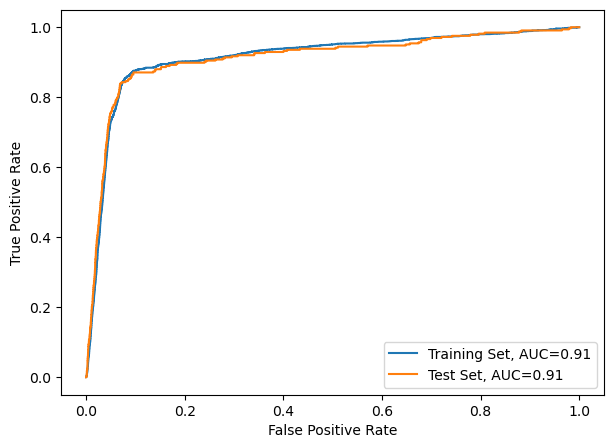

In [158]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr1, tpr1, _ = roc_curve(pred_true[train_mask], pred[train_mask])
fpr2, tpr2, _ = roc_curve(pred_true[test_mask], pred[test_mask])

auc1 = roc_auc_score(pred_true[train_mask], pred[train_mask])
auc2 = roc_auc_score(pred_true[test_mask], pred[test_mask])

fig, ax = plt.subplots(figsize=(7,5))#dpi=150)
RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot(ax=ax, label=f'Training Set, AUC={auc1:.2f}')
RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax, label=f'Test Set, AUC={auc2:.2f}')

In [161]:
pred_true[train_mask]

array([0, 0, 0, ..., 0, 0, 0])

In [166]:
np.shape(X[train_mask]), np.shape(X[~train_mask])

(torch.Size([1151867, 6]), torch.Size([127986, 6]))

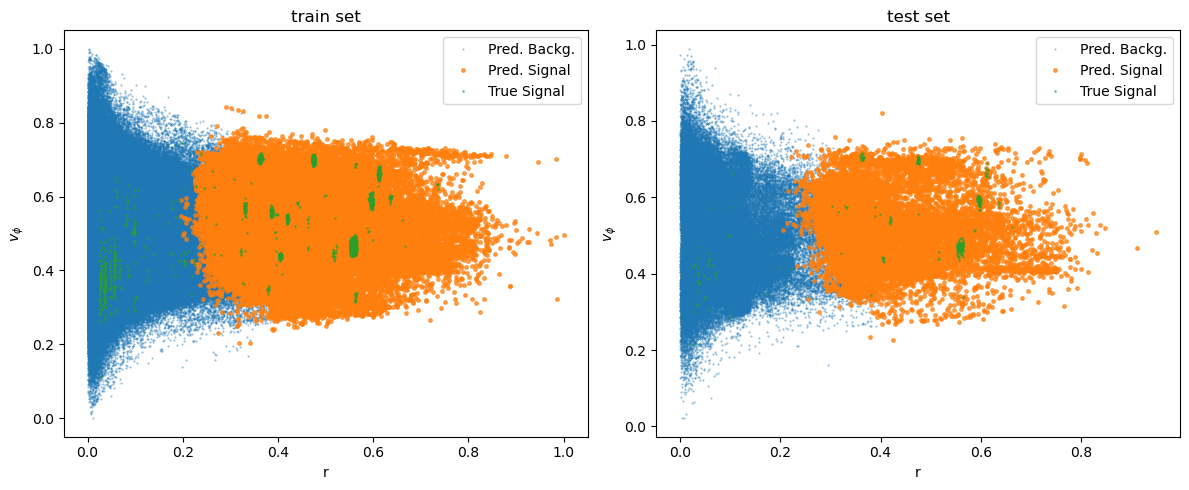

In [169]:
y_pred_train, y_train = pred[train_mask], pred_true[train_mask]
y_pred, y_test = pred[~train_mask], pred_true[~train_mask]

X_train = X[train_mask]
X_test = X[~train_mask]


fig, ax = plt.subplots(1,2, figsize=(12,5))

###
thresh = 0.6
###

mask2 = y_pred_train.reshape(-1) <= thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred_train.reshape(-1) > thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 5, alpha=.7, label='Pred. Signal')
### =================
# y_train = y[mask] ###???
mask2 = y_train.reshape(-1) == 1
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 2, alpha=.5, label='True Signal')
ax[0].legend()
ax[0].set_title('train set')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$v_{\phi}$')

###
# thresh = 0.5
###

mask2 = y_pred.reshape(-1) <= thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred.reshape(-1) > thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 5, alpha=.7, label='Pred. Signal')
mask2 = y_test.reshape(-1) == 1
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 2, alpha=.5, label='True Signal')
ax[1].legend()
ax[1].set_title('test set')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$v_{\phi}$')
plt.tight_layout()

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(f'tn, fp, fn, tp\n{tn, fp, fn, tp}')

In [173]:
y_train.sum(), mask2.sum()

(2948, 325)

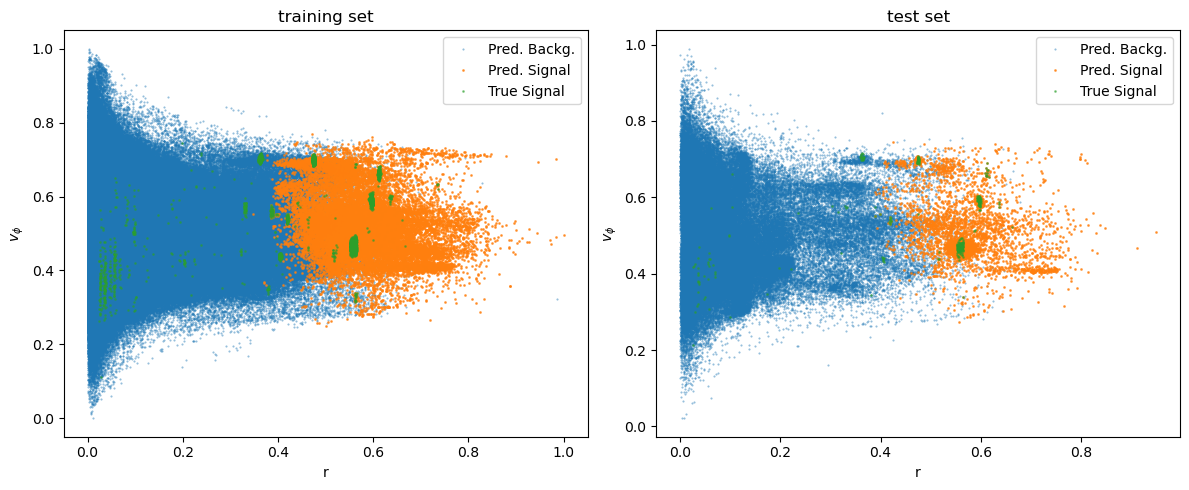

In [176]:
y_pred_train, y_train = pred[train_mask], pred_true[train_mask]
y_pred, y_test = pred[~train_mask], pred_true[~train_mask]

X_train = X[train_mask]
X_test = X[~train_mask]


fig, ax = plt.subplots(1,2, figsize=(12,5))

###
thresh = 0.95
###

mask2 = y_pred_train.reshape(-1) <= thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred_train.reshape(-1) > thresh
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 2, alpha=.7, label='Pred. Signal')
### =================
# y_train = y[mask] ###???
mask2 = y_train.reshape(-1) == 1
ax[0].plot(X_train[:,0][mask2], X_train[:,5][mask2], '.', ms= 2, alpha=.5, label='True Signal')
ax[0].legend()
ax[0].set_title('training set')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$v_{\phi}$')

###
# thresh = 0.5
###

mask2 = y_pred.reshape(-1) <= thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms=1, alpha=.5, label='Pred. Backg.')
mask2 = y_pred.reshape(-1) > thresh
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 2, alpha=.7, label='Pred. Signal')
mask2 = y_test.reshape(-1) == 1
ax[1].plot(X_test[:,0][mask2], X_test[:,5][mask2], '.', ms= 2, alpha=.5, label='True Signal')
ax[1].legend()
ax[1].set_title('test set')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$v_{\phi}$')
plt.tight_layout()

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(f'tn, fp, fn, tp\n{tn, fp, fn, tp}')

In [181]:
train_mask.sum() / (~train_mask).sum()

8.999945306517901